In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading application.csv Data

application_data = pd.read_csv('application_data.csv')
application_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Understanding the Data

In [3]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
application_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.0,189145.5,278202.0,367142.5,456255.0
TARGET,307511.0,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.0,270000.0,513531.0,808650.0,4050000.0
...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,265992.0,0.007000,0.110757,0.0,0.0,0.0,0.0,9.0
AMT_REQ_CREDIT_BUREAU_WEEK,265992.0,0.034362,0.204685,0.0,0.0,0.0,0.0,8.0
AMT_REQ_CREDIT_BUREAU_MON,265992.0,0.267395,0.916002,0.0,0.0,0.0,0.0,27.0
AMT_REQ_CREDIT_BUREAU_QRT,265992.0,0.265474,0.794056,0.0,0.0,0.0,0.0,261.0


### Taking meaningful columns 

In [5]:
list(application_data.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [6]:
application_data = application_data.filter(['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_EMAIL',                                         
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
"DAYS_LAST_PHONE_CHANGE"])

In [7]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [8]:
application_data.shape

(307511, 41)

In [9]:
# Find the percentage of null values in each column
(application_data.isnull().sum() * 100 / len(application_data)).round(2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OCCUPATION_TYPE                31.35
CNT_FAM_MEMBERS                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
F

In [10]:
# To calculate percentage of NaN values in DataFrame
def get_perc_of_missing_values(series):
    num = series.isnull().sum()
    den = len(series)
    return round(num/den, 3)
get_perc_of_missing_values(application_data)

SK_ID_CURR                     0.000
TARGET                         0.000
NAME_CONTRACT_TYPE             0.000
CODE_GENDER                    0.000
FLAG_OWN_CAR                   0.000
FLAG_OWN_REALTY                0.000
CNT_CHILDREN                   0.000
AMT_INCOME_TOTAL               0.000
AMT_CREDIT                     0.000
AMT_ANNUITY                    0.000
AMT_GOODS_PRICE                0.001
NAME_TYPE_SUITE                0.004
NAME_INCOME_TYPE               0.000
NAME_EDUCATION_TYPE            0.000
NAME_FAMILY_STATUS             0.000
NAME_HOUSING_TYPE              0.000
REGION_POPULATION_RELATIVE     0.000
DAYS_BIRTH                     0.000
DAYS_EMPLOYED                  0.000
DAYS_REGISTRATION              0.000
DAYS_ID_PUBLISH                0.000
OCCUPATION_TYPE                0.313
CNT_FAM_MEMBERS                0.000
FLAG_MOBIL                     0.000
FLAG_EMP_PHONE                 0.000
FLAG_WORK_PHONE                0.000
FLAG_CONT_MOBILE               0.000
F

In [11]:
# Iterate over columns in DataFrame and delete the values are null and > 30%

for col, values in application_data.iteritems():
    if get_perc_of_missing_values(application_data[col]) > 0.30:
        application_data.drop(col, axis=1, inplace=True)
application_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,WEDNESDAY,10,0,0,0,0,Business Entity Type 3,0.262949,0.139376,-1134.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,MONDAY,11,0,0,0,0,School,0.622246,NaN,-828.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,MONDAY,9,0,0,0,0,Government,0.555912,0.729567,-815.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,WEDNESDAY,17,0,0,0,0,Business Entity Type 3,0.650442,NaN,-617.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,THURSDAY,11,0,0,0,1,Religion,0.322738,NaN,-1106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,THURSDAY,15,0,0,0,0,Services,0.681632,NaN,-273.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,MONDAY,8,0,0,0,0,XNA,0.115992,NaN,0.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,THURSDAY,9,0,0,0,1,School,0.535722,0.218859,-1909.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,WEDNESDAY,9,0,0,1,1,Business Entity Type 1,0.514163,0.661024,-322.0


In [12]:
application_data.shape

(307511, 39)

In [13]:
# Find the percentage of null values in each column

(application_data.isnull().sum() * 100 / len(application_data)).round(2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
CNT_FAM_MEMBERS                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_EMAIL                      0.00
R

In [14]:
# Removing External_Source_3 Column, since it has almost 20% Missing Values

application_data.drop("EXT_SOURCE_3",axis=1,inplace=True)

In [15]:
application_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


In [16]:
for col, values in application_data.iteritems():
    if get_perc_of_missing_values(application_data[col]) < 0.01:
        print(col,get_perc_of_missing_values(application_data[col]))

SK_ID_CURR 0.0
TARGET 0.0
NAME_CONTRACT_TYPE 0.0
CODE_GENDER 0.0
FLAG_OWN_CAR 0.0
FLAG_OWN_REALTY 0.0
CNT_CHILDREN 0.0
AMT_INCOME_TOTAL 0.0
AMT_CREDIT 0.0
AMT_ANNUITY 0.0
AMT_GOODS_PRICE 0.001
NAME_TYPE_SUITE 0.004
NAME_INCOME_TYPE 0.0
NAME_EDUCATION_TYPE 0.0
NAME_FAMILY_STATUS 0.0
NAME_HOUSING_TYPE 0.0
REGION_POPULATION_RELATIVE 0.0
DAYS_BIRTH 0.0
DAYS_EMPLOYED 0.0
DAYS_REGISTRATION 0.0
DAYS_ID_PUBLISH 0.0
CNT_FAM_MEMBERS 0.0
FLAG_MOBIL 0.0
FLAG_EMP_PHONE 0.0
FLAG_WORK_PHONE 0.0
FLAG_CONT_MOBILE 0.0
FLAG_EMAIL 0.0
REGION_RATING_CLIENT 0.0
REGION_RATING_CLIENT_W_CITY 0.0
WEEKDAY_APPR_PROCESS_START 0.0
HOUR_APPR_PROCESS_START 0.0
REG_REGION_NOT_LIVE_REGION 0.0
REG_REGION_NOT_WORK_REGION 0.0
REG_CITY_NOT_LIVE_CITY 0.0
REG_CITY_NOT_WORK_CITY 0.0
ORGANIZATION_TYPE 0.0
EXT_SOURCE_2 0.002
DAYS_LAST_PHONE_CHANGE 0.0


In [17]:
application_data.shape

(307511, 38)

In [18]:
# Since from the above code we can intepret that "AMT_GOODS_PRICE ,EXT_SOURCE_2,"" has very low missing values and 
# we can fill those columns with Mean Values beacuse for the other columns CNT_SOCIAL_CIRCLE series there is no definite mean, percentile values,
# so that we will fill mean values

application_data['AMT_GOODS_PRICE'].fillna((application_data['AMT_GOODS_PRICE'].mean()), inplace=True)
application_data['EXT_SOURCE_2'].fillna((application_data['EXT_SOURCE_2'].mean()), inplace=True)


In [19]:
# With the mean values

application_data[["AMT_GOODS_PRICE","EXT_SOURCE_2"]].describe().T

,count,mean,std,min,25%,50%,75%,max
AMT_GOODS_PRICE,307511.0,538396.207429,369279.426396,4.050000e+04,238500.000000,450000.000000,679500.000000,4050000.000
EXT_SOURCE_2,307511.0,0.514393,0.190855,8.173617e-08,0.392974,0.565467,0.663422,0.855


In [20]:
application_data.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [21]:
# Unaccompanied data has the highest mode, so filling missing values with Unaccompanied

application_data["NAME_TYPE_SUITE"].fillna(application_data["NAME_TYPE_SUITE"].mode()[0],inplace=True)


### Finding Outliers

In [22]:
application_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307511.0,538396.207429,369279.426396,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


In [23]:
# AMT_ANNUITY,CNT_FAM_MEMBERS columns has few NaN values, filling it with mean value

application_data['AMT_ANNUITY'].fillna((application_data['AMT_ANNUITY'].mean()), inplace=True)
application_data['CNT_FAM_MEMBERS'].fillna((application_data['CNT_FAM_MEMBERS'].mean()), inplace=True)
application_data['DAYS_LAST_PHONE_CHANGE'].fillna((application_data['DAYS_LAST_PHONE_CHANGE'].mean()), inplace=True)

In [24]:
application_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307511.0,27108.573909,14493.454517,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307511.0,538396.207429,369279.426396,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


In [25]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
outlier_df = application_data.select_dtypes(include=numerics)

In [26]:
outlier_df.shape

(307511, 27)

In [27]:
outlier_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307511.0,27108.573909,14493.454517,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307511.0,538396.207429,369279.426396,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


<ipython-input-28-a7880e8fb350>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, ax = plt.subplots(1,1,figsize=(8,8))


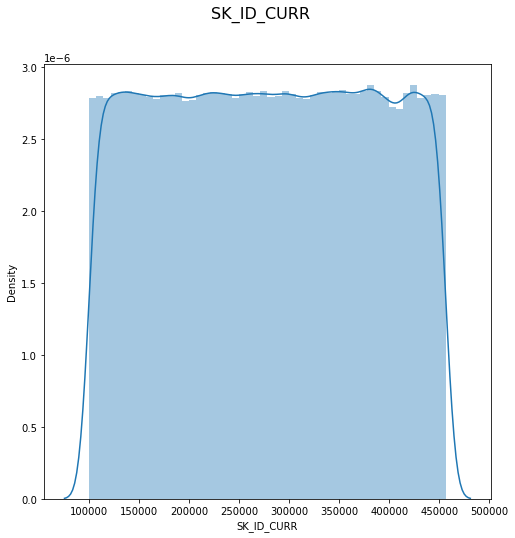

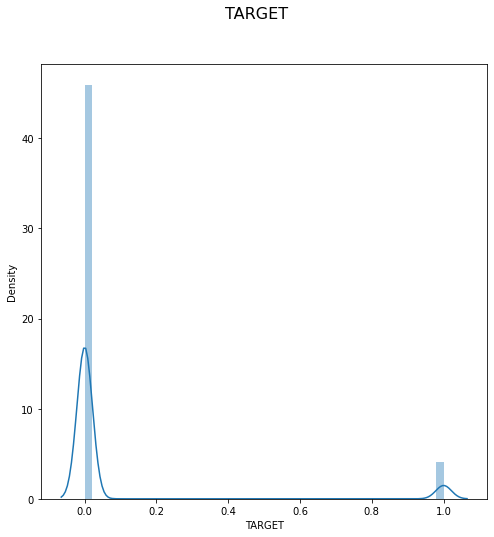

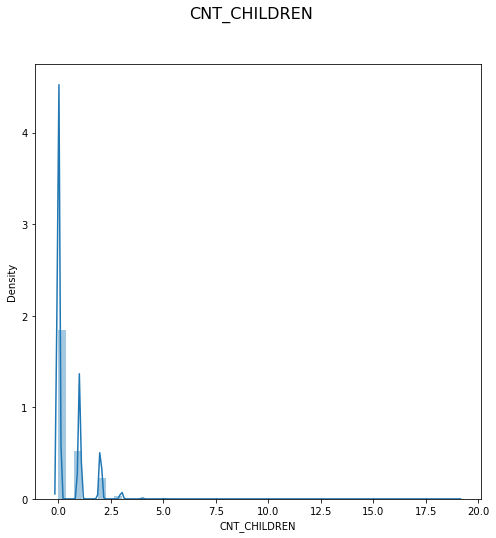

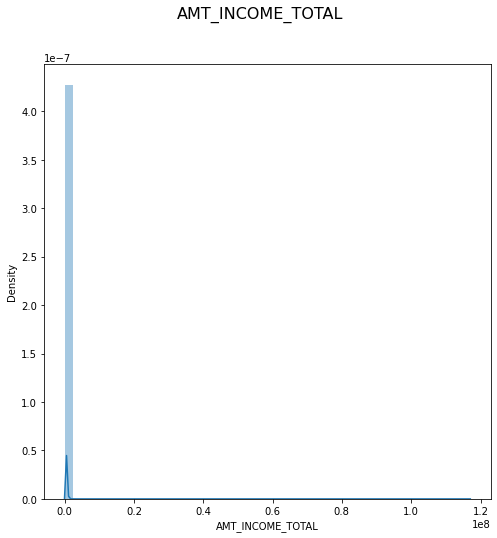

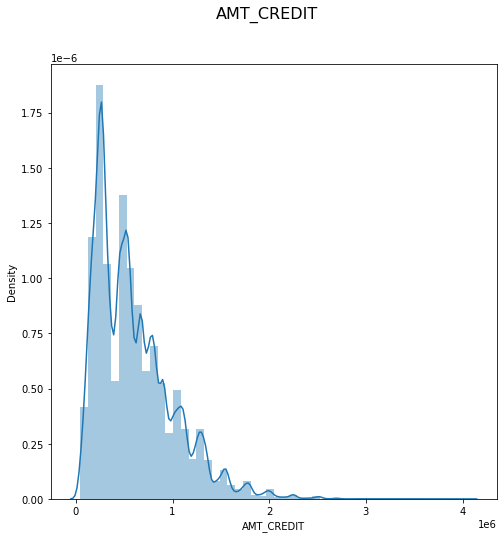

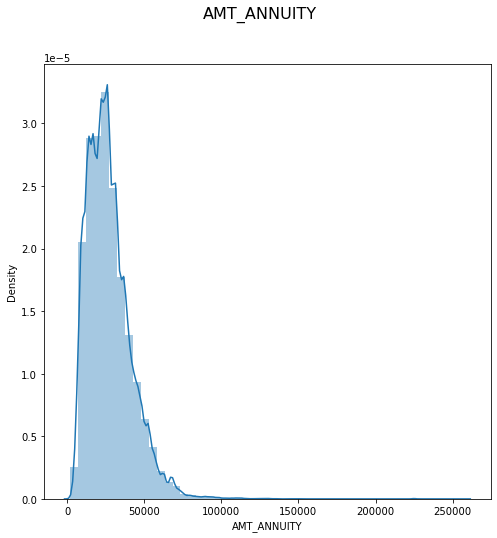

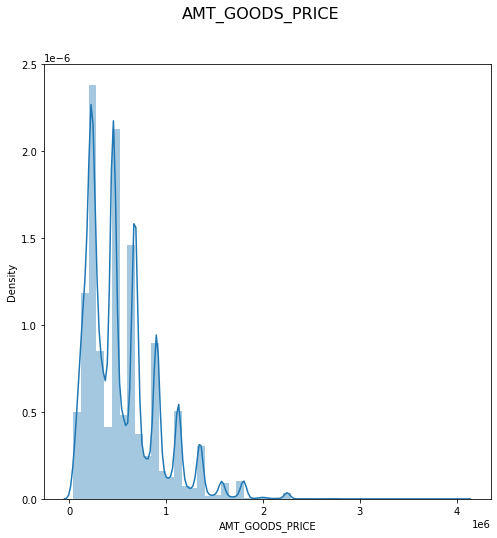

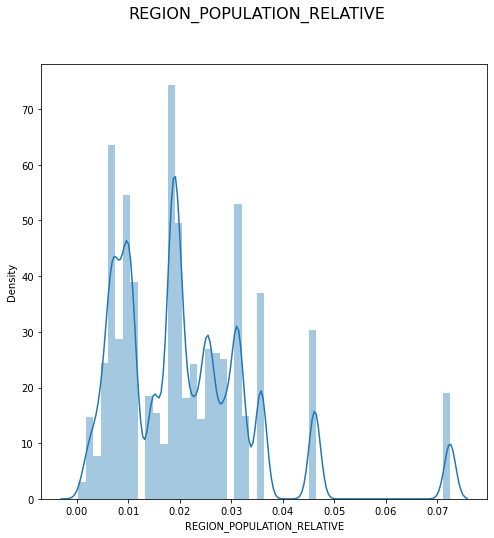

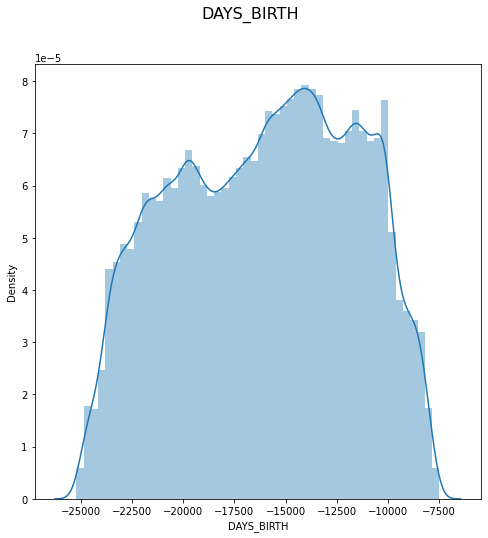

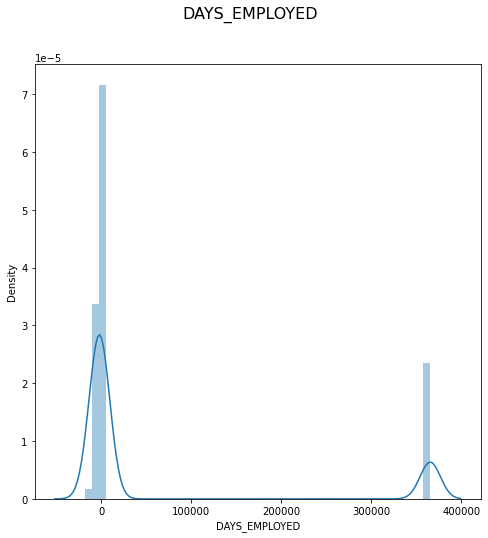

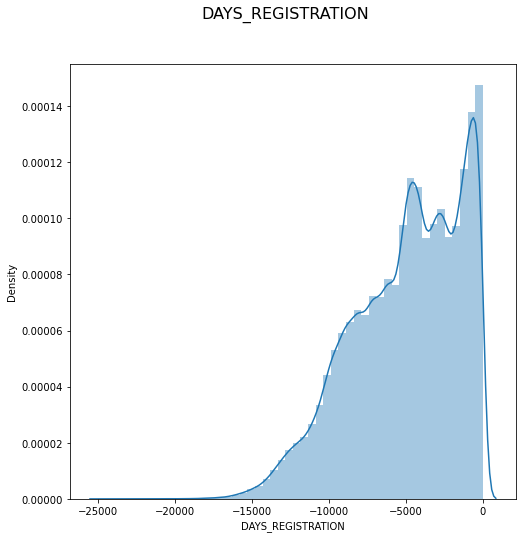

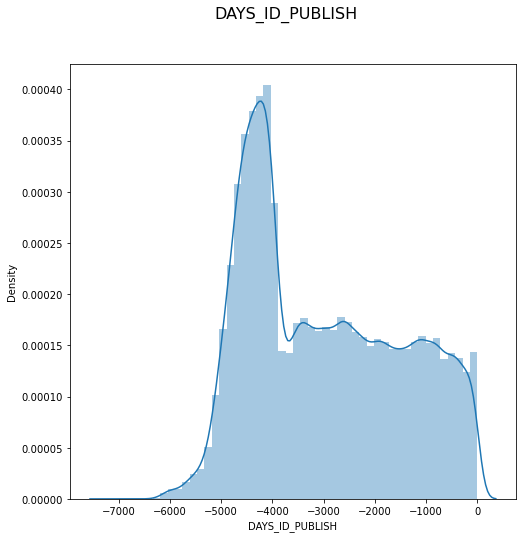

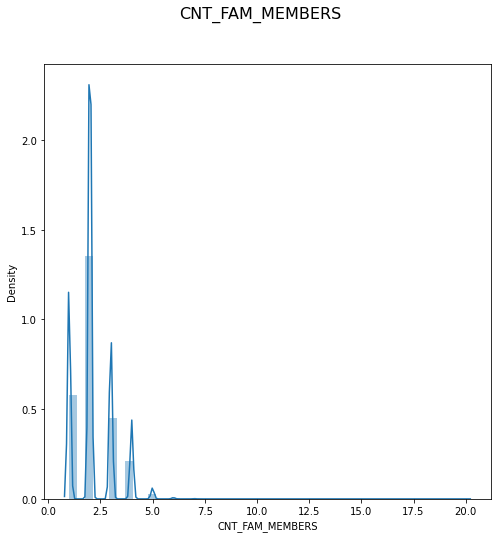

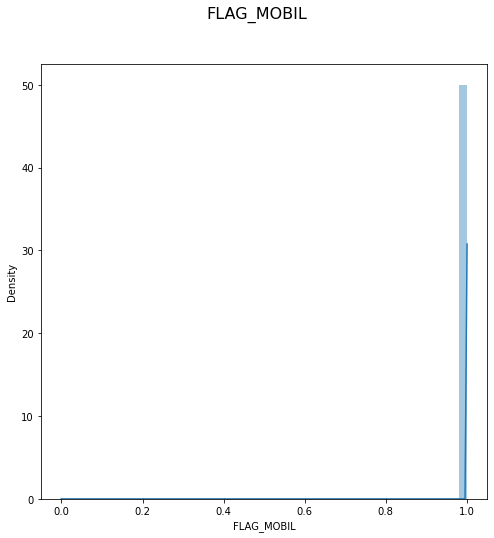

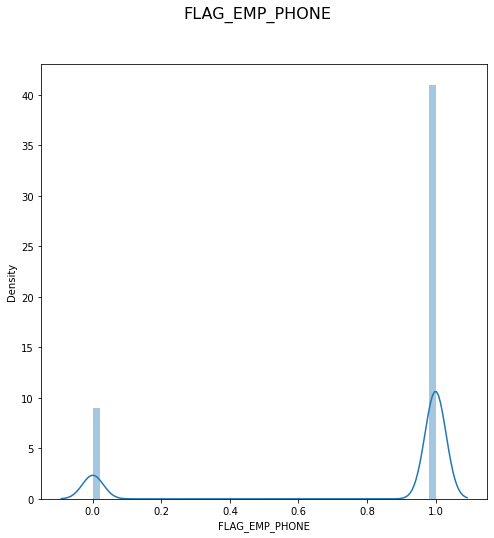

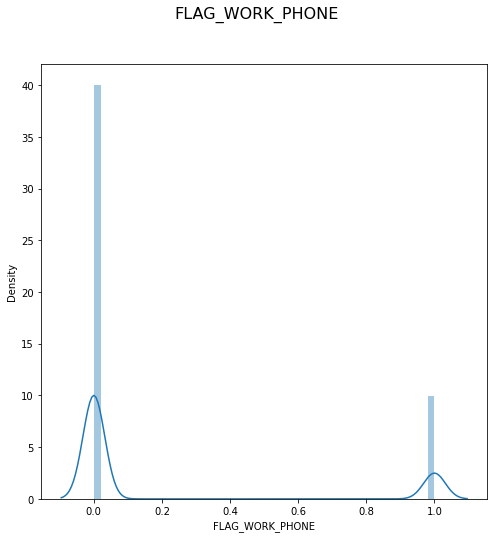

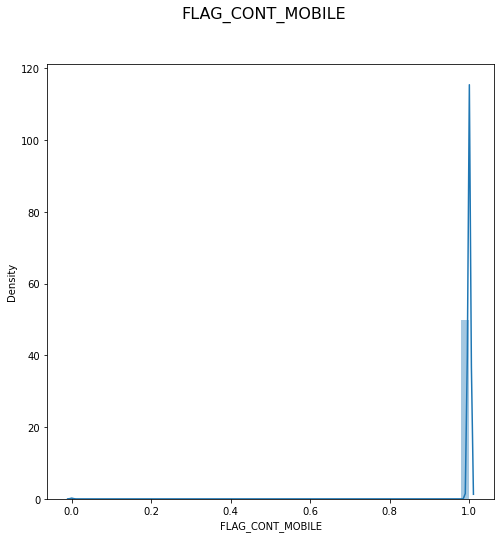

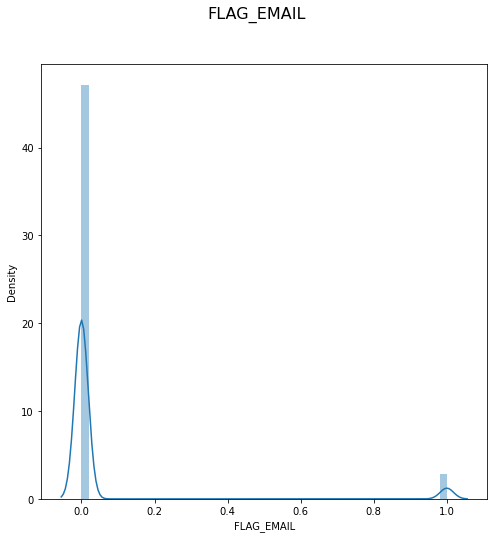

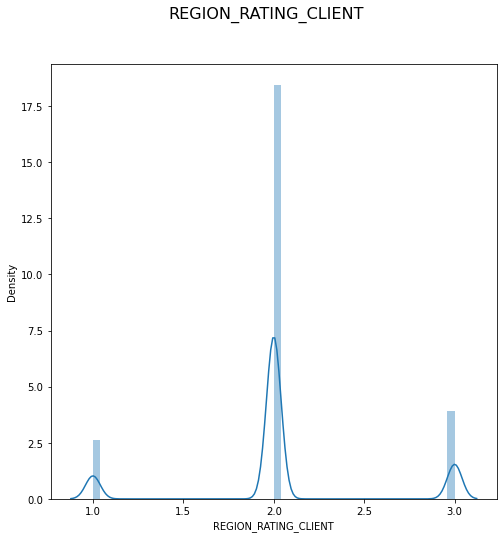

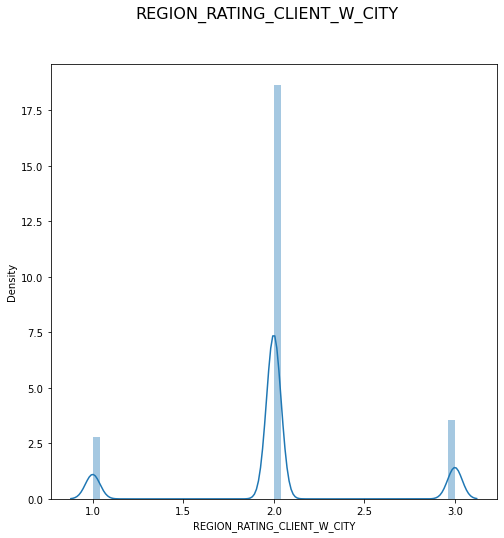

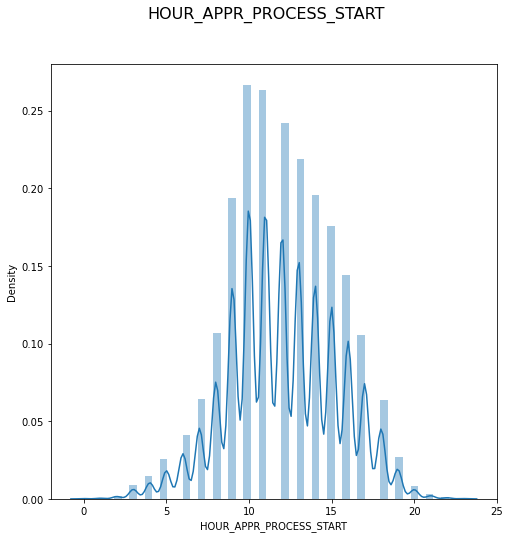

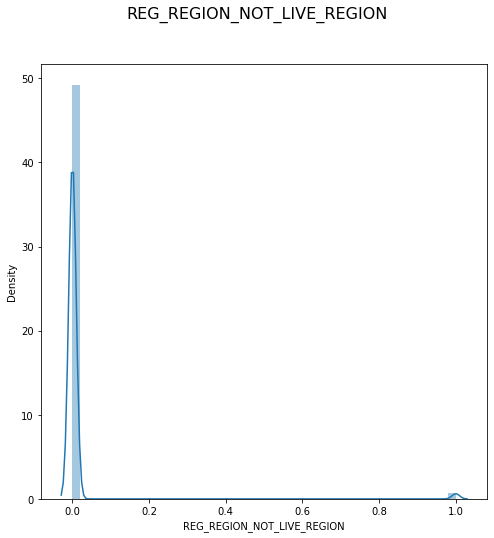

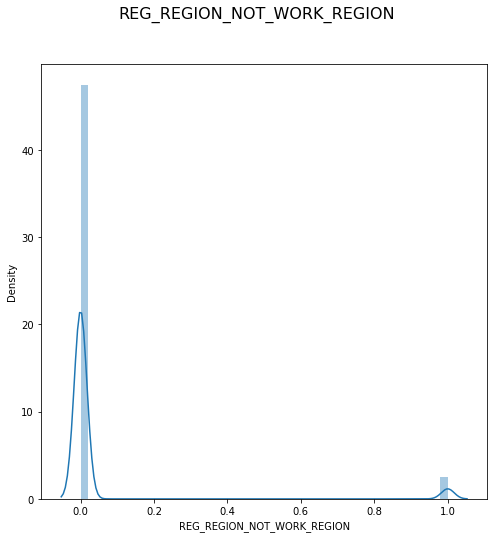

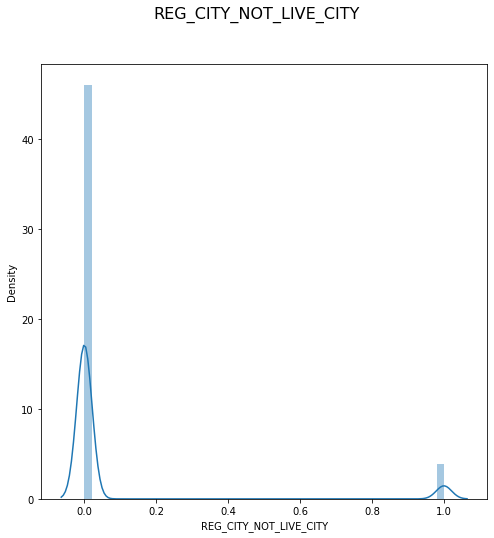

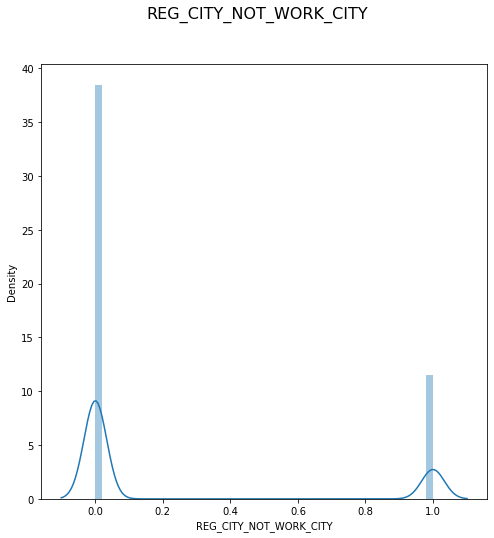

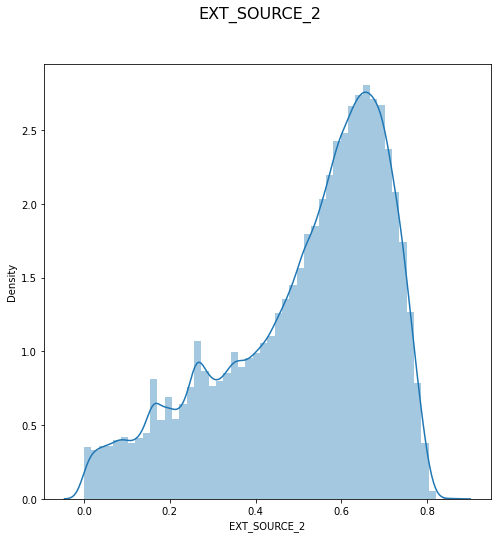

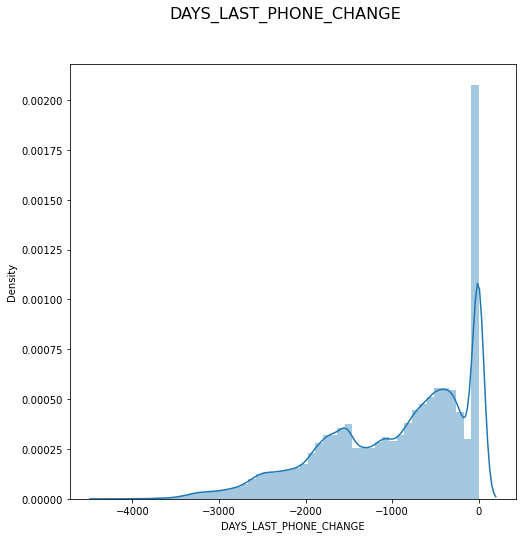

In [28]:
for cols,values in outlier_df.iteritems():
    f, ax = plt.subplots(1,1,figsize=(8,8))
    f.suptitle(cols, fontsize=16)
    outlier_plot = sns.distplot(outlier_df[cols])

Above box plot for **CNT_CHILDREN** shows a large outlier(19). It is very rare to have 19 children.

In the **DAYS_EMPLOYED** there is a value present at 36k range, this wont be possible.

In the plot **AMT_INCOME_TOTAL**, we can see that the MAX amount is way larger than the other statistical data [Mean,(25,50,75)percentiles]

In [29]:
application_data[["CNT_CHILDREN","DAYS_EMPLOYED","AMT_INCOME_TOTAL"]].describe().T

,count,mean,std,min,25%,50%,75%,max
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-17912.0,-2760.0,-1213.0,-289.0,365243.0
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0


In [30]:
q1=application_data["CNT_CHILDREN"].quantile(0.99)
q1

3.0

In [31]:
application_data.CNT_CHILDREN.value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

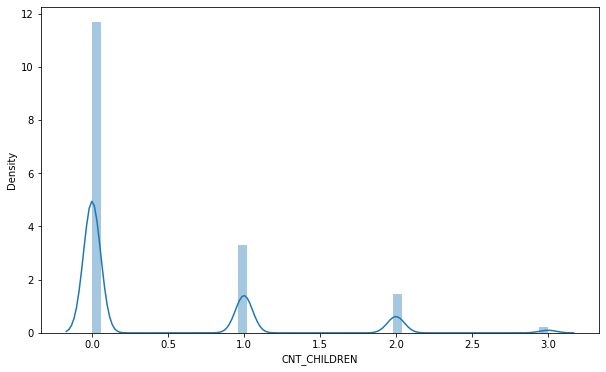

In [32]:
q1=application_data["CNT_CHILDREN"].quantile(0.99)
application_data["CNT_CHILDREN"] =  application_data.CNT_CHILDREN.apply(lambda x: q1 if x>q1 else x)

f, ax = plt.subplots(figsize=(10,6))
outlier_plot_1 = sns.distplot(application_data["CNT_CHILDREN"])

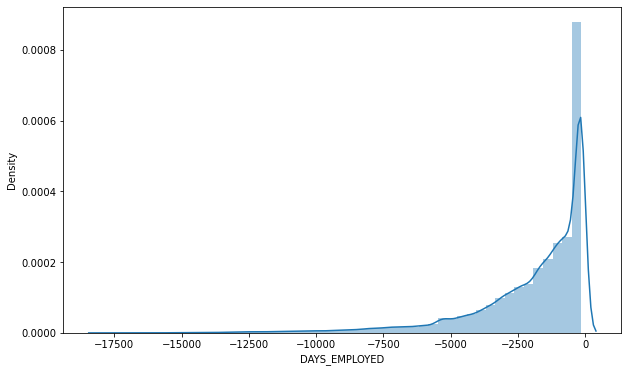

In [33]:
q2=application_data["DAYS_EMPLOYED"].quantile(0.80)
application_data["DAYS_EMPLOYED"] =  application_data.DAYS_EMPLOYED.apply(lambda x: q2 if x>q2 else x)

f, ax = plt.subplots(figsize=(10,6))
outlier_plot_2 = sns.distplot(application_data["DAYS_EMPLOYED"])

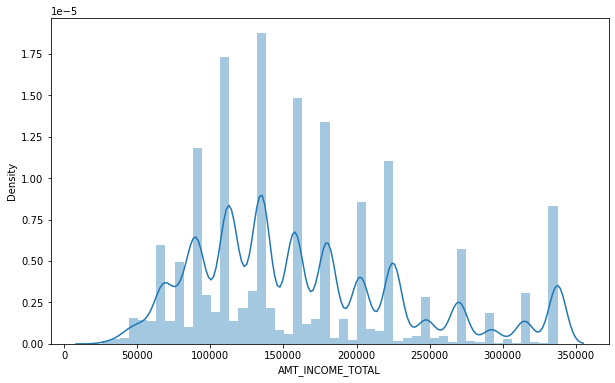

In [34]:
q3=application_data["AMT_INCOME_TOTAL"].quantile(0.95)
application_data["AMT_INCOME_TOTAL"] =  application_data.AMT_INCOME_TOTAL.apply(lambda x: q3 if x>q3 else x)

f, ax = plt.subplots(figsize=(10,6))
outlier_plot_3 = sns.distplot(application_data["AMT_INCOME_TOTAL"])

In [35]:
application_data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,...,2,WEDNESDAY,10,0,0,0,0,Business Entity Type 3,0.262949,-1134.0
1,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,1,MONDAY,11,0,0,0,0,School,0.622246,-828.0
2,100004,0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,...,2,MONDAY,9,0,0,0,0,Government,0.555912,-815.0
3,100006,0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,...,2,WEDNESDAY,17,0,0,0,0,Business Entity Type 3,0.650442,-617.0
4,100007,0,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,...,2,THURSDAY,11,0,0,0,1,Religion,0.322738,-1106.0


In [36]:
# Converting DAYS_BIRTH to AGE
application_data["AGE"] = application_data.DAYS_BIRTH.apply(lambda x :round(abs(x)/365),0)
application_data["AGE"]
application_data["AGE"] = pd.to_numeric(application_data["AGE"])

In [37]:
# Drop "DAYS_BIRTH" column, As DAYS converted to AGE
application_data.drop("DAYS_BIRTH",axis=1,inplace=True)

In [38]:
application_data.AMT_INCOME_TOTAL.quantile([0.25,0.5,0.85,1])

0.25    112500.0
0.50    147150.0
0.85    234000.0
1.00    337500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [39]:
application_data.CNT_FAM_MEMBERS.unique()

array([ 1.        ,  2.        ,  3.        ,  4.        ,  5.        ,
        6.        ,  9.        ,  7.        ,  8.        , 10.        ,
       13.        ,  2.15266545, 14.        , 12.        , 20.        ,
       15.        , 16.        , 11.        ])

In [40]:
# Round off the decimal values

application_data.CNT_FAM_MEMBERS = application_data.CNT_FAM_MEMBERS.apply(lambda x : round(x,0))

### Binning Salary Amount to Categories

In [41]:
# Based on the Quantile Values and Categoriesing

def salary_category_func(x):
    if x<337500 and x>=234000:
        return('HIGH')
    elif x<234000 and x>=147150:
        return('MODERATE')
    elif x<147150 and x>=112500:
        return('LOW')
    else:
        return("EXTREMLY LOW")
application_data["SALARY_CATEGORY"] = application_data.AMT_INCOME_TOTAL.apply(salary_category_func)    
application_data["SALARY_CATEGORY"]    
        

0             MODERATE
1                 HIGH
2         EXTREMLY LOW
3                  LOW
4                  LOW
              ...     
307506        MODERATE
307507    EXTREMLY LOW
307508        MODERATE
307509        MODERATE
307510        MODERATE
Name: SALARY_CATEGORY, Length: 307511, dtype: object

In [42]:
application_data.SALARY_CATEGORY.value_counts()

MODERATE        106966
EXTREMLY LOW     85384
LOW              84194
HIGH             30967
Name: SALARY_CATEGORY, dtype: int64

In [43]:
# Drop "AMT_INCOME_TOTAL" Column

application_data.drop("AMT_INCOME_TOTAL",axis=1,inplace=True)

### Analysing the count of Target variables

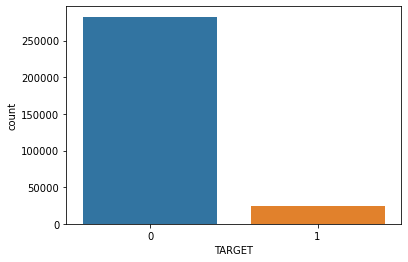

In [44]:
Target_count= sns.countplot("TARGET",data =application_data)

There is a huge imbalance in out Target variable, dividing the Target variable into two different dataframes

# Dividing the Application into Two Dataframes based on the Target Variable

In [45]:
good_client = application_data[application_data.TARGET == 0]
defaulter_client = application_data[application_data.TARGET == 1]

In [46]:
good_client.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282686 entries, 1 to 307510
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   282686 non-null  int64  
 1   TARGET                       282686 non-null  int64  
 2   NAME_CONTRACT_TYPE           282686 non-null  object 
 3   CODE_GENDER                  282686 non-null  object 
 4   FLAG_OWN_CAR                 282686 non-null  object 
 5   FLAG_OWN_REALTY              282686 non-null  object 
 6   CNT_CHILDREN                 282686 non-null  float64
 7   AMT_CREDIT                   282686 non-null  float64
 8   AMT_ANNUITY                  282686 non-null  float64
 9   AMT_GOODS_PRICE              282686 non-null  float64
 10  NAME_TYPE_SUITE              282686 non-null  object 
 11  NAME_INCOME_TYPE             282686 non-null  object 
 12  NAME_EDUCATION_TYPE          282686 non-null  object 
 13 

In [47]:
defaulter_client.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24825 entries, 0 to 307509
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   24825 non-null  int64  
 1   TARGET                       24825 non-null  int64  
 2   NAME_CONTRACT_TYPE           24825 non-null  object 
 3   CODE_GENDER                  24825 non-null  object 
 4   FLAG_OWN_CAR                 24825 non-null  object 
 5   FLAG_OWN_REALTY              24825 non-null  object 
 6   CNT_CHILDREN                 24825 non-null  float64
 7   AMT_CREDIT                   24825 non-null  float64
 8   AMT_ANNUITY                  24825 non-null  float64
 9   AMT_GOODS_PRICE              24825 non-null  float64
 10  NAME_TYPE_SUITE              24825 non-null  object 
 11  NAME_INCOME_TYPE             24825 non-null  object 
 12  NAME_EDUCATION_TYPE          24825 non-null  object 
 13  NAME_FAMILY_STA

## Check for clients who are unlikely to pay the loans

In [48]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
Univariate_defaulter_Num_1_df = defaulter_client.select_dtypes(include=numerics)
Univariate_defaulter_Num_1_df

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE,AGE
0,100002,1,0.0,406597.5,24700.5,351000.0,0.018801,-637.0,-3648.0,-2120,...,2,2,10,0,0,0,0,0.262949,-1134.0,26
26,100031,1,0.0,979992.0,27076.5,702000.0,0.018029,-2628.0,-6573.0,-1827,...,3,2,9,0,0,0,0,0.548477,-161.0,51
40,100047,1,0.0,1193580.0,35028.0,855000.0,0.025164,-1262.0,-1182.0,-1029,...,2,2,9,0,0,0,0,0.306841,-1075.0,48
42,100049,1,0.0,288873.0,16258.5,238500.0,0.007305,-3597.0,-45.0,-4409,...,3,3,11,0,0,0,0,0.674203,-1480.0,37
81,100096,1,0.0,252000.0,14593.5,252000.0,0.028663,-144.0,-5391.0,-4199,...,2,2,10,0,0,0,0,0.023952,0.0,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307448,456186,1,1.0,450000.0,32746.5,450000.0,0.020246,-3048.0,-8507.0,-2580,...,3,3,16,0,0,0,0,0.329708,-324.0,27
307475,456215,1,1.0,1303200.0,46809.0,1125000.0,0.007330,-2405.0,-500.0,-4704,...,2,2,13,0,0,0,0,0.583214,-1492.0,37
307481,456225,1,0.0,297000.0,19975.5,297000.0,0.008575,-3147.0,-8921.0,-3832,...,2,2,15,0,0,0,0,0.713524,-2941.0,57
307489,456233,1,0.0,521280.0,23089.5,450000.0,0.014464,-286.0,-8291.0,-9,...,2,2,5,0,0,0,0,0.615261,-307.0,45


In [49]:
categorical = ["object"]
Univariate_defaulter_Cat_1_df =defaulter_client.select_dtypes(include=categorical)
Univariate_defaulter_Cat_1_df

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,SALARY_CATEGORY
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,WEDNESDAY,Business Entity Type 3,MODERATE
26,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,MONDAY,Business Entity Type 3,LOW
40,Cash loans,M,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,TUESDAY,Business Entity Type 3,MODERATE
42,Cash loans,F,N,N,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,THURSDAY,Self-employed,LOW
81,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,THURSDAY,XNA,EXTREMLY LOW
...,...,...,...,...,...,...,...,...,...,...,...,...
307448,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,MONDAY,Business Entity Type 3,MODERATE
307475,Cash loans,F,N,N,Unaccompanied,Working,Higher education,Civil marriage,House / apartment,THURSDAY,Construction,LOW
307481,Cash loans,M,N,Y,Family,Working,Secondary / secondary special,Married,House / apartment,FRIDAY,Business Entity Type 3,MODERATE
307489,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,FRIDAY,Business Entity Type 3,MODERATE


**_FLAG_OWN_REALTY_**

 property and repayment of loans

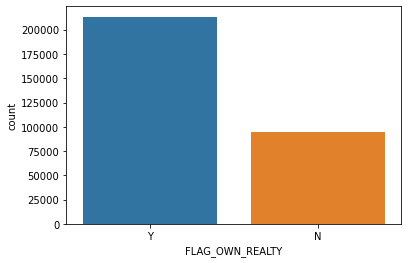

In [50]:
# Number of property owners and non-property owners

PropertyOwners_vs_Total = sns.countplot("FLAG_OWN_REALTY",data =application_data)

From above plot, clients having real estate acquirements are more that the ones who don't have any property.

In [51]:
# Percentage of property and non-property owners in the defaulter list

test_df1=round((Univariate_defaulter_Cat_1_df["FLAG_OWN_REALTY"].value_counts()/application_data["FLAG_OWN_REALTY"].value_counts())*100,2)
test_df1 = pd.DataFrame(test_df1)
test_df1.reset_index(level=0, inplace=True)
test_df1.rename(columns=  {"index": "FLAG_OWN_REALTY", 
                     "FLAG_OWN_REALTY":"Default_Percentage"}, 
                                 inplace = True) 
test_df1

,FLAG_OWN_REALTY,Default_Percentage
0,Y,7.96
1,N,8.32


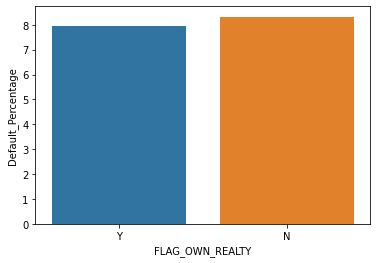

In [52]:
# Number of property and non-property owners vs Target variable. Here, Target = 1

PropertyOwners_vs_Target= sns.barplot(x="FLAG_OWN_REALTY",y="Default_Percentage",data=test_df1)

We can see that the number defaulters are almost equal to 9%. It is difficult to decide a target based on this metric.

**_CODE_GENDER_**

Does gender of client affects the repayment of loans ?

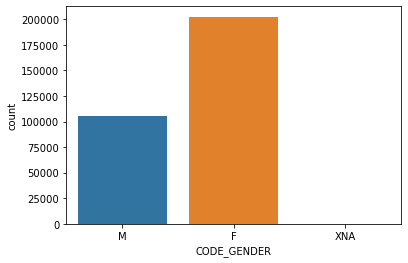

In [53]:
# Males and Femals in the entire polulation

Gender_vs_Total = sns.countplot("CODE_GENDER",data =application_data)

In [54]:
# Percentage of males and females in the defaulter list

test_df2=round((Univariate_defaulter_Cat_1_df["CODE_GENDER"].value_counts()/application_data["CODE_GENDER"].value_counts())*100,2)
test_df2 = pd.DataFrame(test_df2)
test_df2.reset_index(level=0, inplace=True)
test_df2.rename(columns=  {"index": "CODE_GENDER", 
                     "CODE_GENDER":"Default_Percentage"}, 
                                 inplace = True) 
test_df2

,CODE_GENDER,Default_Percentage
0,F,7.00
1,M,10.14
2,XNA,NaN


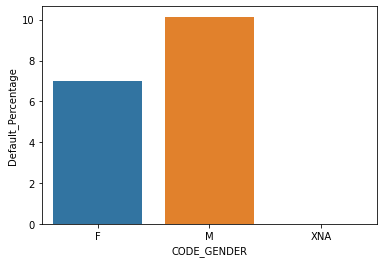

In [55]:
# Number male and female clients vs. Target variable

Gender_vs_Target= sns.barplot(x="CODE_GENDER",y="Default_Percentage",data=test_df2)

The Female clients are a better TARGET as compared to the Male clients. By observing the percent of defaulted credits, male client have a higher chance of not returning their loans [10.14%], with compared to the female clients [7%].

**_FLAG_OWN_CAR _**

The car owners and non-car owners differ in their repayment of loans

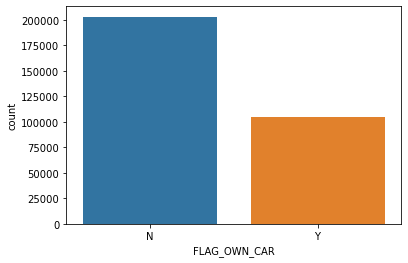

In [56]:
# Car owners and non-carOwners in the entire polulation

CarOwner_vs_Total = sns.countplot("FLAG_OWN_CAR",data =application_data)

Clients who don't own vehicles are more in the given polulation.

In [57]:
# Percentage of car owners and non-carOwners in the defaulter list

test_df3=round((Univariate_defaulter_Cat_1_df["FLAG_OWN_CAR"].value_counts()/application_data["FLAG_OWN_CAR"].value_counts())*100,2)
test_df3 = pd.DataFrame(test_df3)
test_df3.reset_index(level=0, inplace=True)
test_df3.rename(columns=  {"index": "FLAG_OWN_CAR", 
                     "FLAG_OWN_CAR":"Default_Percentage"}, 
                                 inplace = True) 
test_df3

,FLAG_OWN_CAR,Default_Percentage
0,N,8.50
1,Y,7.24


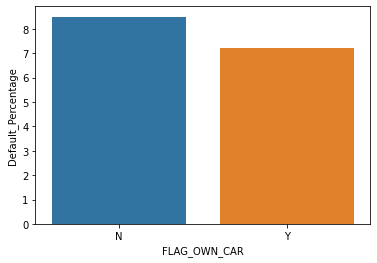

In [58]:
# Car owners and non-carOwners vs. Target variable

CarOwner_vs_Target= sns.barplot(x="FLAG_OWN_CAR",y="Default_Percentage",data=test_df3)

The clients, owns a car are less likely to not repay the loan when compared to the ones that does not own a car. 
The loan non-repayment rates of both the Car Owners and Non-Car Owners are very close.

**_NAME_FAMILY_STATUS_**

Family status of clients affect their repayment of loans

In [59]:
x = application_data.NAME_FAMILY_STATUS.value_counts()
x = pd.DataFrame(x)
x.reset_index(level=0, inplace=True)
x.rename(columns=  {"index": "NAME_FAMILY_STATUS", 
                     "NAME_FAMILY_STATUS":"number"}, 
                                 inplace = True) 
x

,NAME_FAMILY_STATUS,number
0,Married,196432
1,Single / not married,45444
2,Civil marriage,29775
3,Separated,19770
4,Widow,16088
5,Unknown,2


[Text(0, 0, 'Married'),
 Text(1, 0, 'Single / not married'),
 Text(2, 0, 'Civil marriage'),
 Text(3, 0, 'Separated'),
 Text(4, 0, 'Widow'),
 Text(5, 0, 'Unknown')]

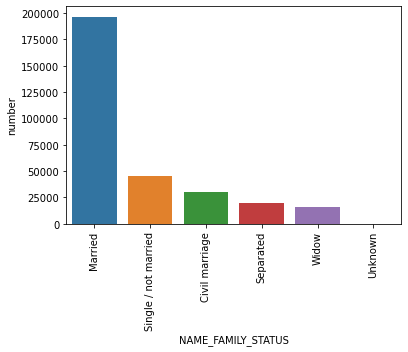

In [60]:
# Family status of clients in the entire polulation

FamilyStatus_vs_Total = sns.barplot(x="NAME_FAMILY_STATUS",y="number",data =x)
FamilyStatus_vs_Total.set_xticklabels(FamilyStatus_vs_Total.get_xticklabels(),rotation=90)

Most of clients are married, followed by Single and civil marriage.

In [61]:
# Clients according to family status in the defaulter list

test_df4=round((Univariate_defaulter_Cat_1_df["NAME_FAMILY_STATUS"].value_counts()/application_data["NAME_FAMILY_STATUS"].value_counts())*100,2)
test_df4 = pd.DataFrame(test_df4)
test_df4.reset_index(level=0, inplace=True)
test_df4.rename(columns=  {"index": "NAME_FAMILY_STATUS", 
                     "NAME_FAMILY_STATUS":"Default_Percentage"}, 
                                 inplace = True) 
test_df4.sort_values(by='Default_Percentage', inplace=True)
test_df4

,NAME_FAMILY_STATUS,Default_Percentage
5,Widow,5.82
1,Married,7.56
2,Separated,8.19
3,Single / not married,9.81
0,Civil marriage,9.94
4,Unknown,NaN


[Text(0, 0, 'Widow'),
 Text(1, 0, 'Married'),
 Text(2, 0, 'Separated'),
 Text(3, 0, 'Single / not married'),
 Text(4, 0, 'Civil marriage'),
 Text(5, 0, 'Unknown')]

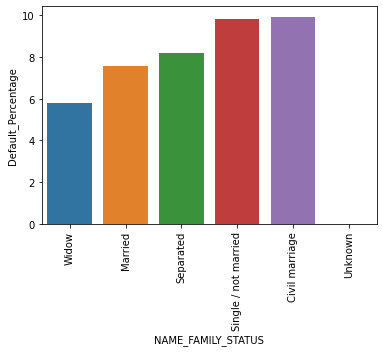

In [62]:
# Family status of client vs. Target variable

FamilyStatus_vs_Target= sns.barplot(x="NAME_FAMILY_STATUS",y="Default_Percentage",data=test_df4)
FamilyStatus_vs_Target.set_xticklabels(FamilyStatus_vs_Target.get_xticklabels(),rotation=90)

Percentage of non-repayment of loan is at highest for civil mariage and is lowest for widows.

**_CNT_CHILDREN_**

The number of children in a family affects the non-repayment of loans

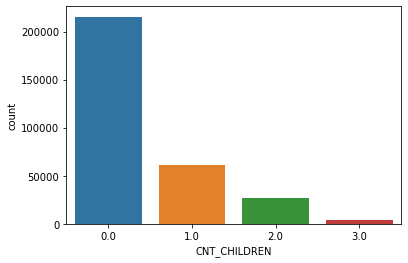

In [63]:
# Number of children per client in the entire polulation

NoOfChildren_vs_Total = sns.countplot("CNT_CHILDREN",data =application_data)

In [64]:
# Percentage number of children per client in the defaulter list

test_df5=round((Univariate_defaulter_Num_1_df["CNT_CHILDREN"].value_counts()/application_data["CNT_CHILDREN"].value_counts())*100,2)
test_df5 = pd.DataFrame(test_df5)
test_df5.reset_index(level=0, inplace=True)

test_df5.rename(columns=  {"index": "CNT_CHILDREN", 
                     "CNT_CHILDREN":"Default_Percentage"}, 
                                 inplace = True)
test_df5.sort_values(by=["Default_Percentage"],ascending=False,inplace=True)
test_df5

,CNT_CHILDREN,Default_Percentage
3,3.0,10.04
1,1.0,8.92
2,2.0,8.72
0,0.0,7.71


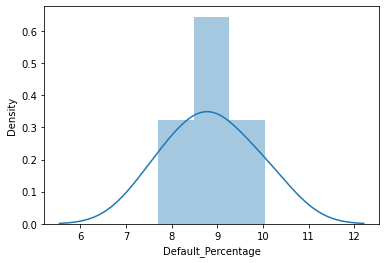

In [65]:
# The number of children per client vs. Target variable

NoOfChildren_vs_Target = sns.distplot(test_df5["Default_Percentage"])

Ther is more chance for a client with more children to not repay the loan back. The more the number of children the more difficult it is for the client to repay the loan due to more personal expenditures.

**_CNT_FAM_MEMBERS_**

In [66]:
y = application_data.CNT_FAM_MEMBERS.value_counts()
y = pd.DataFrame(y)
y.reset_index(level=0, inplace=True)
y.rename(columns=  {"index": "CNT_FAM_MEMBERS", 
                     "CNT_FAM_MEMBERS":"number"}, 
                                 inplace = True) 
y

,CNT_FAM_MEMBERS,number
0,2.0,158359
1,1.0,67847
2,3.0,52601
3,4.0,24697
4,5.0,3478
5,6.0,408
6,7.0,81
7,8.0,20
8,9.0,6
9,10.0,3


[Text(0, 0, '1.0'),
 Text(1, 0, '2.0'),
 Text(2, 0, '3.0'),
 Text(3, 0, '4.0'),
 Text(4, 0, '5.0'),
 Text(5, 0, '6.0'),
 Text(6, 0, '7.0'),
 Text(7, 0, '8.0'),
 Text(8, 0, '9.0'),
 Text(9, 0, '10.0'),
 Text(10, 0, '11.0'),
 Text(11, 0, '12.0'),
 Text(12, 0, '13.0'),
 Text(13, 0, '14.0'),
 Text(14, 0, '15.0'),
 Text(15, 0, '16.0'),
 Text(16, 0, '20.0')]

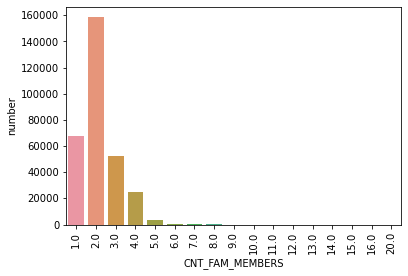

In [67]:
# Number of family members per client in the entire polulation

NoOfFamilyMembers_vs_Total = sns.barplot(x="CNT_FAM_MEMBERS",y="number",data =y)
NoOfFamilyMembers_vs_Total.set_xticklabels(NoOfFamilyMembers_vs_Total.get_xticklabels(),rotation=90)

In [68]:
# Percentage number of family members per client the defaulter list
test_df6=round((Univariate_defaulter_Num_1_df["CNT_FAM_MEMBERS"].value_counts()/application_data["CNT_FAM_MEMBERS"].value_counts())*100,2)
test_df6 = pd.DataFrame(test_df6)
test_df6.reset_index(level=0, inplace=True)
test_df6.rename(columns=  {"index": "CNT_FAM_MEMBERS", 
                     "CNT_FAM_MEMBERS":"Default_Percentage"}, 
                                 inplace = True) 
test_df6.sort_values(by=["Default_Percentage"],ascending=False,inplace=True)
test_df6

,CNT_FAM_MEMBERS,Default_Percentage
10,11.0,100.00
12,13.0,100.00
9,10.0,33.33
7,8.0,30.00
5,6.0,13.48
4,5.0,9.40
2,3.0,8.76
3,4.0,8.65
0,1.0,8.36
1,2.0,7.58


[Text(0, 0, '1.0'),
 Text(1, 0, '2.0'),
 Text(2, 0, '3.0'),
 Text(3, 0, '4.0'),
 Text(4, 0, '5.0'),
 Text(5, 0, '6.0'),
 Text(6, 0, '7.0'),
 Text(7, 0, '8.0'),
 Text(8, 0, '9.0'),
 Text(9, 0, '10.0'),
 Text(10, 0, '11.0'),
 Text(11, 0, '12.0'),
 Text(12, 0, '13.0'),
 Text(13, 0, '14.0'),
 Text(14, 0, '15.0'),
 Text(15, 0, '16.0'),
 Text(16, 0, '20.0')]

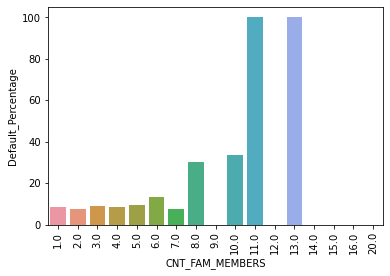

In [69]:
# The number of family members per client vs. Target variable

NoOfFamilyMembers_vs_Target= sns.barplot(x="CNT_FAM_MEMBERS",y="Default_Percentage",data=test_df6)
NoOfFamilyMembers_vs_Target.set_xticklabels(NoOfFamilyMembers_vs_Target.get_xticklabels(),rotation=90)

Families with 11,13 members shows highest default rate, but their count is very less [2] 

_NAME_EDUCATION_TYPE_

[Text(0, 0, 'Secondary / secondary special'),
 Text(1, 0, 'Higher education'),
 Text(2, 0, 'Incomplete higher'),
 Text(3, 0, 'Lower secondary'),
 Text(4, 0, 'Academic degree')]

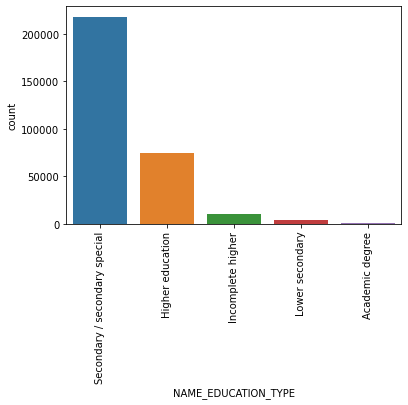

In [70]:
# Education type in the entire polulation

EducationType_vs_Total = sns.countplot("NAME_EDUCATION_TYPE",data =application_data)
EducationType_vs_Total.set_xticklabels(EducationType_vs_Total.get_xticklabels(),rotation=90)

In [71]:
# Percentage education level of clients in the defaulter list

test_df7=round((Univariate_defaulter_Cat_1_df["NAME_EDUCATION_TYPE"].value_counts()/application_data["NAME_EDUCATION_TYPE"].value_counts())*100,2)

test_df7 = pd.DataFrame(test_df7)

test_df7.reset_index(level=0, inplace=True)
test_df7.sort_values(by=["NAME_EDUCATION_TYPE"],ascending=False,inplace=True)

test_df7.rename(columns=  {"index": "NAME_EDUCATION_TYPE", 
                     "NAME_EDUCATION_TYPE":"Default_Percentage"}, 
                                  inplace = True) 


test_df7

,NAME_EDUCATION_TYPE,Default_Percentage
3,Lower secondary,10.93
0,Secondary / secondary special,8.94
2,Incomplete higher,8.48
1,Higher education,5.36
4,Academic degree,1.83


<AxesSubplot:xlabel='NAME_EDUCATION_TYPE', ylabel='Default_Percentage'>

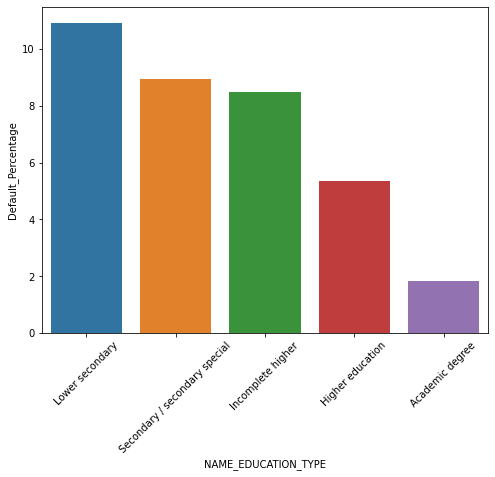

In [72]:
# The Education type of each client vs. Target variable

f, ax = plt.subplots(figsize=(8,6))
EducationType_vs_Target= sns.barplot(x="NAME_EDUCATION_TYPE",y="Default_Percentage",data=test_df7,order=test_df7['NAME_EDUCATION_TYPE'])
EducationType_vs_Target.set_xticklabels(EducationType_vs_Target.get_xticklabels(), rotation=45)
EducationType_vs_Target

The more educated clients are likely to repay their loans because they will be having more stable jobs with monthly income.

_NAME_TYPE_SUITE

[Text(0, 0, 'Unaccompanied'),
 Text(1, 0, 'Family'),
 Text(2, 0, 'Spouse, partner'),
 Text(3, 0, 'Children'),
 Text(4, 0, 'Other_A'),
 Text(5, 0, 'Other_B'),
 Text(6, 0, 'Group of people')]

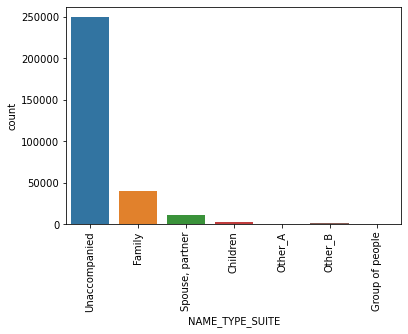

In [73]:
TypeSuite_vs_Total = sns.countplot("NAME_TYPE_SUITE",data =application_data)
TypeSuite_vs_Total.set_xticklabels(TypeSuite_vs_Total.get_xticklabels(),rotation=90)

In [74]:
test_df8=round((Univariate_defaulter_Cat_1_df["NAME_TYPE_SUITE"].value_counts()/application_data["NAME_TYPE_SUITE"].value_counts())*100,2)

test_df8 = pd.DataFrame(test_df8)

test_df8.reset_index(level=0, inplace=True)
test_df8.sort_values(by=["NAME_TYPE_SUITE"],ascending=False,inplace=True)

test_df8.rename(columns=  {"index": "NAME_TYPE_SUITE", 
                     "NAME_TYPE_SUITE":"Default_Percentage"}, 
                                  inplace = True) 


test_df8

,NAME_TYPE_SUITE,Default_Percentage
4,Other_B,9.83
5,Other_A,8.78
6,Group of people,8.49
0,Unaccompanied,8.17
2,"Spouse, partner",7.87
1,Family,7.49
3,Children,7.38


<AxesSubplot:xlabel='NAME_TYPE_SUITE', ylabel='Default_Percentage'>

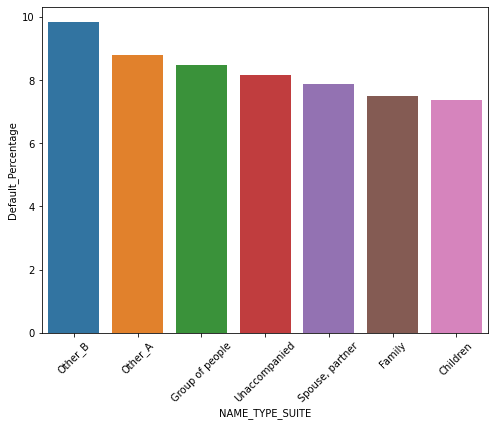

In [75]:
f, ax = plt.subplots(figsize=(8,6))
TypeSuite_vs_Target= sns.barplot(x="NAME_TYPE_SUITE",y="Default_Percentage",data=test_df8
                                         ,order=test_df8['NAME_TYPE_SUITE'])
TypeSuite_vs_Target.set_xticklabels(TypeSuite_vs_Target.get_xticklabels(), rotation=45)
TypeSuite_vs_Target

_ORGANISATION_TYPE_

In [76]:
test_df9=round((Univariate_defaulter_Cat_1_df["ORGANIZATION_TYPE"].value_counts()/application_data["ORGANIZATION_TYPE"].value_counts())*100,2)

test_df9 = pd.DataFrame(test_df9)

test_df9.reset_index(level=0, inplace=True)
test_df9.sort_values(by=["ORGANIZATION_TYPE"],ascending=False,inplace=True)

test_df9.rename(columns=  {"index": "ORGANIZATION_TYPE", 
                     "ORGANIZATION_TYPE":"Default_Percentage"}, 
                                  inplace = True) 


test_df9

,ORGANIZATION_TYPE,Default_Percentage
54,Transport: type 3,15.75
18,Industry: type 13,13.43
25,Industry: type 8,12.50
38,Restaurant,11.71
7,Construction,11.68
6,Cleaning,11.15
14,Industry: type 1,11.07
20,Industry: type 3,10.62
36,Realtor,10.61
1,Agriculture,10.47


<AxesSubplot:xlabel='ORGANIZATION_TYPE', ylabel='Default_Percentage'>

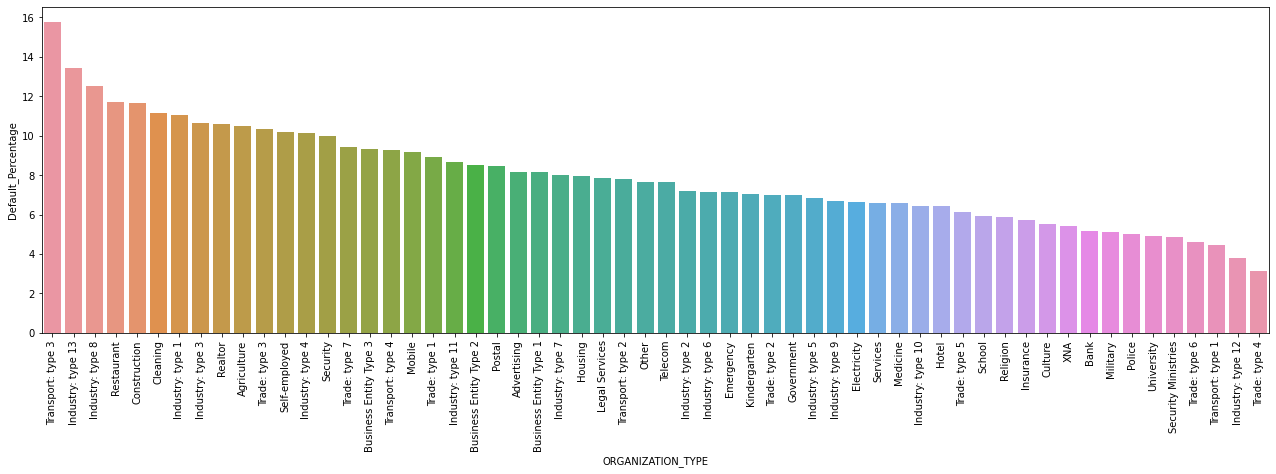

In [77]:
f, ax = plt.subplots(figsize=(22,6))
OrganizationType_vs_Target= sns.barplot(x="ORGANIZATION_TYPE",y="Default_Percentage",data=test_df9
                                         ,order=test_df9['ORGANIZATION_TYPE'])
OrganizationType_vs_Target.set_xticklabels(OrganizationType_vs_Target.get_xticklabels(), rotation=90)
OrganizationType_vs_Target

From above graph, highest number of non-repayment can be seen in Applicants who work in Transport Type3.

_NAME_HOUSING_TYPE_

[Text(0, 0, 'House / apartment'),
 Text(1, 0, 'Rented apartment'),
 Text(2, 0, 'With parents'),
 Text(3, 0, 'Municipal apartment'),
 Text(4, 0, 'Office apartment'),
 Text(5, 0, 'Co-op apartment')]

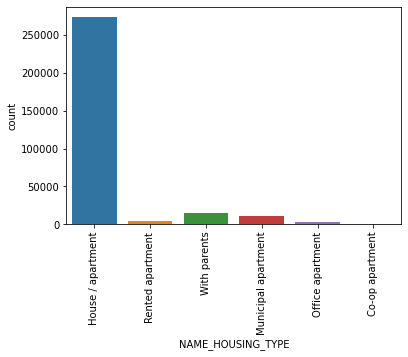

In [78]:
# Housing type of each client in the entire polulation

HousingType_vs_Total = sns.countplot("NAME_HOUSING_TYPE",data =application_data)
HousingType_vs_Total.set_xticklabels(HousingType_vs_Total.get_xticklabels(),rotation=90)

In [79]:
# Percentage housing type of each client the defaulter list

test_df10=round((Univariate_defaulter_Cat_1_df["NAME_HOUSING_TYPE"].value_counts()/application_data["NAME_HOUSING_TYPE"].value_counts())*100,2)
test_df10 = pd.DataFrame(test_df10)
test_df10.reset_index(level=0, inplace=True)
test_df10.rename(columns=  {"index": "NAME_HOUSING_TYPE", 
                     "NAME_HOUSING_TYPE":"Default_Percentage"}, 
                                 inplace = True) 
test_df10.sort_values(by = 'Default_Percentage' , inplace = True, ascending = False)
test_df10

,NAME_HOUSING_TYPE,Default_Percentage
3,Rented apartment,12.31
1,With parents,11.70
2,Municipal apartment,8.54
5,Co-op apartment,7.93
0,House / apartment,7.80
4,Office apartment,6.57


[Text(0, 0, 'Rented apartment'),
 Text(1, 0, 'With parents'),
 Text(2, 0, 'Municipal apartment'),
 Text(3, 0, 'Co-op apartment'),
 Text(4, 0, 'House / apartment'),
 Text(5, 0, 'Office apartment')]

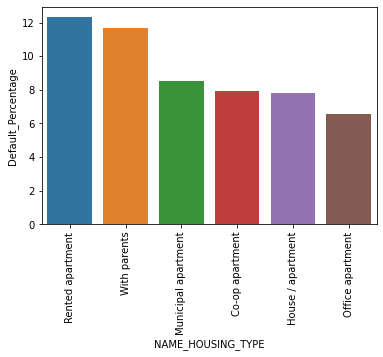

In [80]:
# Housing type of each client client vs. Target variable

HousingType_vs_Target= sns.barplot(x="NAME_HOUSING_TYPE",y="Default_Percentage",data=test_df10)
HousingType_vs_Target.set_xticklabels(HousingType_vs_Target.get_xticklabels(),rotation=90)

People with rented apartments are less likely to pay back their loans.

## BIVARIATE ANALYSIS

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='AMT_GOODS_PRICE'>

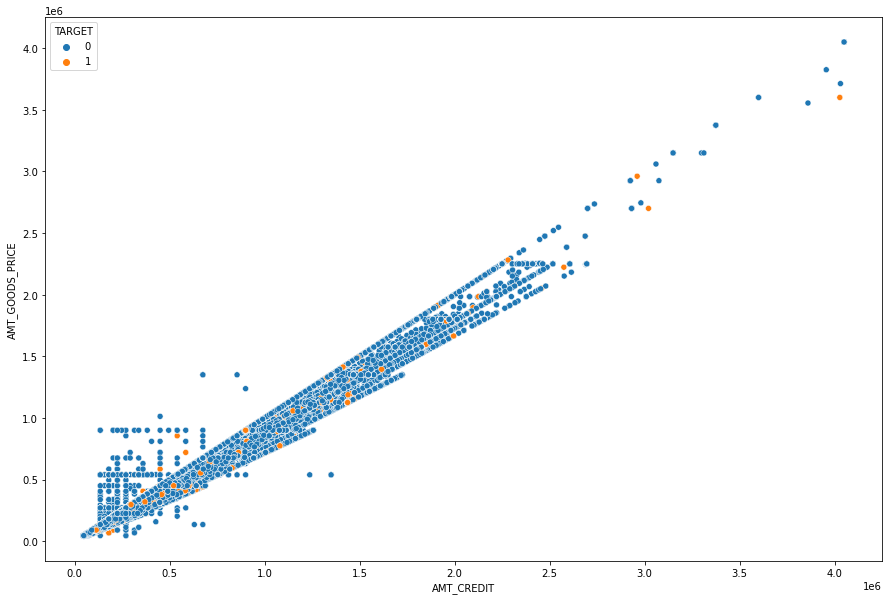

In [81]:
f, ax = plt.subplots(figsize=(15,10))
sns.scatterplot("AMT_CREDIT","AMT_GOODS_PRICE",data=application_data,hue="TARGET")

### Salary Category vs Client who provided Home Number

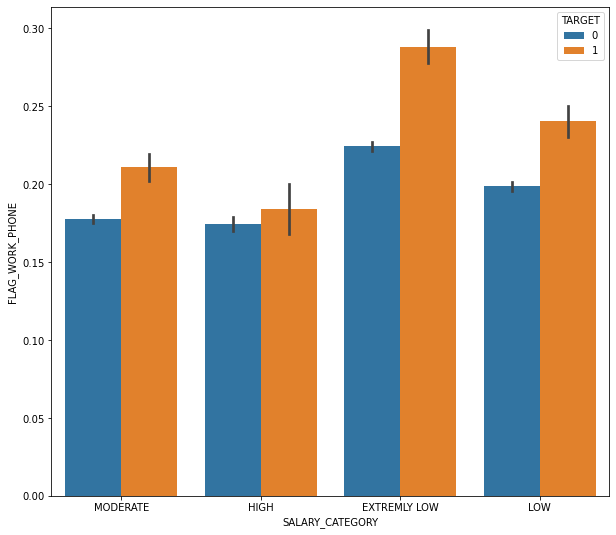

In [82]:
f, ax = plt.subplots(figsize=(10,9))
plot_1=sns.barplot("SALARY_CATEGORY","FLAG_WORK_PHONE",data=application_data,hue="TARGET")

Client with Extremly low salary has more chance to be a Defaulter, when he did not provide the Home phone number. Here approximately 30% people only produced the phone number

### Salary vs Client whose Permanent Address not match with Contact Address at Region Level

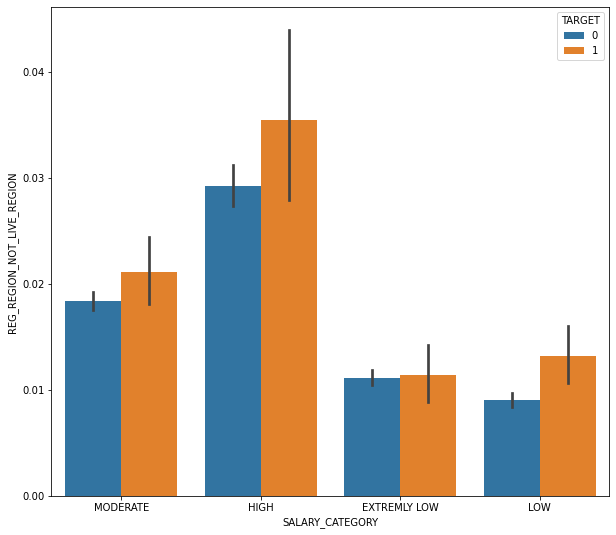

In [83]:
f, ax = plt.subplots(figsize=(10,9))
plot_1=sns.barplot("SALARY_CATEGORY","REG_REGION_NOT_LIVE_REGION",data=application_data,hue="TARGET")

When Client with lower salary and address doest match, then there is a higher chance for he/she to be defaulter

### Salary vs Client whose Permanent Address not match with Work Address at Region Level

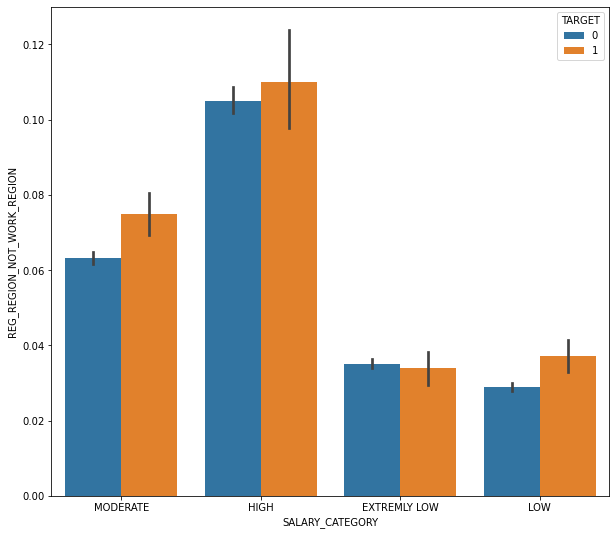

In [84]:
f, ax = plt.subplots(figsize=(10,9))
plot_1=sns.barplot("SALARY_CATEGORY","REG_REGION_NOT_WORK_REGION",data=application_data,hue="TARGET")

When Client has lower salary and Work address doest match, then there is a higher chance for he/she to be defaulter

### Salary vs Client whose Permanent Address not match with Contact Address at City Level

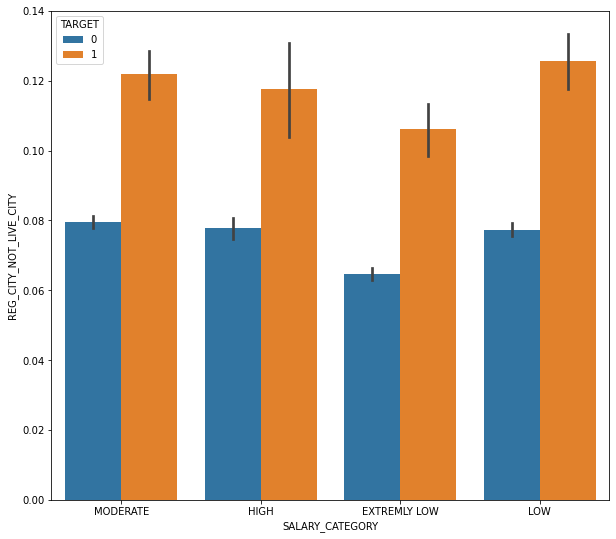

In [85]:
f, ax = plt.subplots(figsize=(10,9))
plot_1=sns.barplot("SALARY_CATEGORY","REG_CITY_NOT_LIVE_CITY",data=application_data,hue="TARGET")

When Client gets LOWER salary and if his/her CONTACT address(CITY-LEVEL) doest match, then there is a Higher chance for him/her to be defaulter

### Salary vs Client whose Permanent Address not match with Work Address at City Level

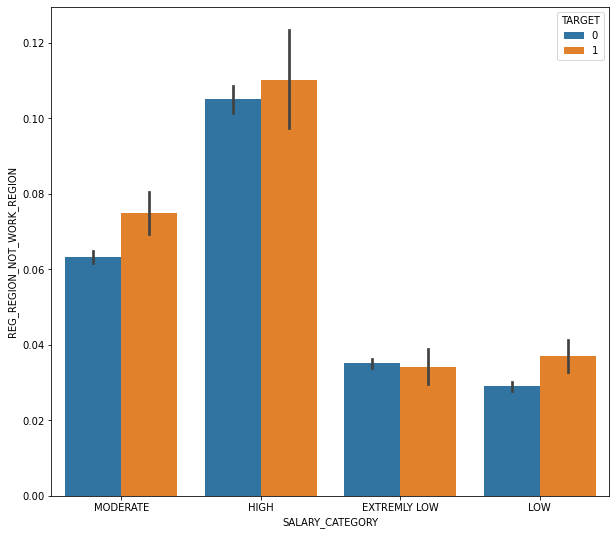

In [86]:
f, ax = plt.subplots(figsize=(10,9))
plot_1=sns.barplot("SALARY_CATEGORY","REG_REGION_NOT_WORK_REGION",data=application_data,hue="TARGET")

When Client gets LOWER salary and if his/her WORK address(CITY-LEVEL) doest match, then there is a Higher chance for him/her to be defaulter

## INCOME TYPE

### Income vs Children count

[Text(0, 0, 'Working'),
 Text(1, 0, 'State servant'),
 Text(2, 0, 'Commercial associate'),
 Text(3, 0, 'Pensioner'),
 Text(4, 0, 'Unemployed'),
 Text(5, 0, 'Student'),
 Text(6, 0, 'Businessman'),
 Text(7, 0, 'Maternity leave')]

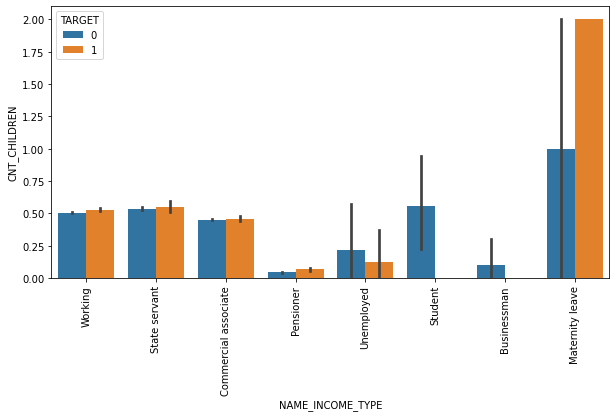

In [87]:
f, ax = plt.subplots(figsize=(10,5))
plot_1=sns.barplot("NAME_INCOME_TYPE","CNT_CHILDREN",data=application_data,hue="TARGET")
plot_1.set_xticklabels(plot_1.get_xticklabels(), rotation=90)

People who geting income via Maternity Leave tends to be more Defaulter when they have more children

### Income vs No. of FamilyMembers

[Text(0, 0, 'Working'),
 Text(1, 0, 'State servant'),
 Text(2, 0, 'Commercial associate'),
 Text(3, 0, 'Pensioner'),
 Text(4, 0, 'Unemployed'),
 Text(5, 0, 'Student'),
 Text(6, 0, 'Businessman'),
 Text(7, 0, 'Maternity leave')]

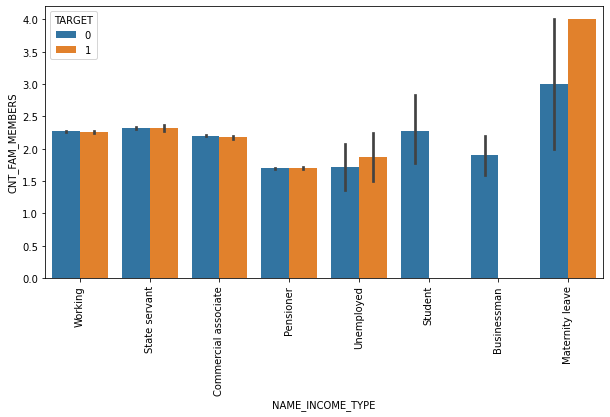

In [88]:
f, ax = plt.subplots(figsize=(10,5))
plot_1=sns.barplot("NAME_INCOME_TYPE","CNT_FAM_MEMBERS",data=application_data,hue="TARGET")
plot_1.set_xticklabels(plot_1.get_xticklabels(), rotation=90)

People who geting income via Maternity Leave tends to be more Defaulter when they have more Family Members

### Income Type vs Client whose Permanent Address not match with Contact Address at egion Level

[Text(0, 0, 'Working'),
 Text(1, 0, 'State servant'),
 Text(2, 0, 'Commercial associate'),
 Text(3, 0, 'Pensioner'),
 Text(4, 0, 'Unemployed'),
 Text(5, 0, 'Student'),
 Text(6, 0, 'Businessman'),
 Text(7, 0, 'Maternity leave')]

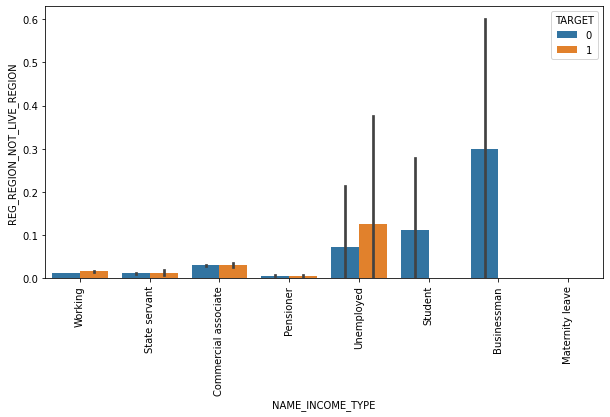

In [89]:
f, ax = plt.subplots(figsize=(10,5))
plot_1=sns.barplot("NAME_INCOME_TYPE","REG_REGION_NOT_LIVE_REGION",data=application_data,hue="TARGET")
plot_1.set_xticklabels(plot_1.get_xticklabels(), rotation=90)

Client who are Unemployed has more chance to be a defaulter , when their Permanent Address does not match with the Contact Address in the Regional Level

# FAMILY STATUS

### Family Status vs Count Of Children

[Text(0, 0, 'Single / not married'),
 Text(1, 0, 'Married'),
 Text(2, 0, 'Civil marriage'),
 Text(3, 0, 'Widow'),
 Text(4, 0, 'Separated'),
 Text(5, 0, 'Unknown')]

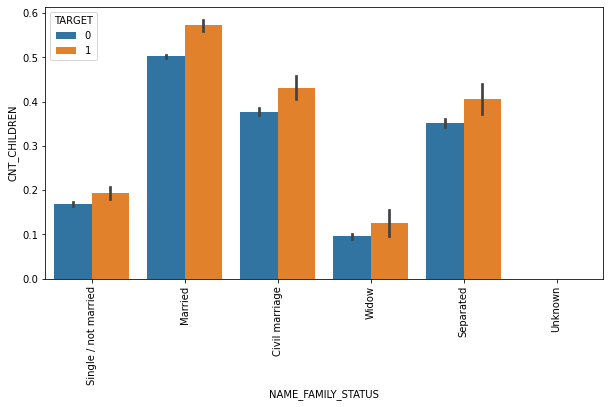

In [90]:
f, ax = plt.subplots(figsize=(10,5))
plot_1=sns.barplot("NAME_FAMILY_STATUS","CNT_CHILDREN",data=application_data,hue="TARGET")
plot_1.set_xticklabels(plot_1.get_xticklabels(), rotation=90)

Client who are married and has more children, chances to be a defaulter in High. 

### Family Status vs Count Of Family Members

[Text(0, 0, 'Single / not married'),
 Text(1, 0, 'Married'),
 Text(2, 0, 'Civil marriage'),
 Text(3, 0, 'Widow'),
 Text(4, 0, 'Separated'),
 Text(5, 0, 'Unknown')]

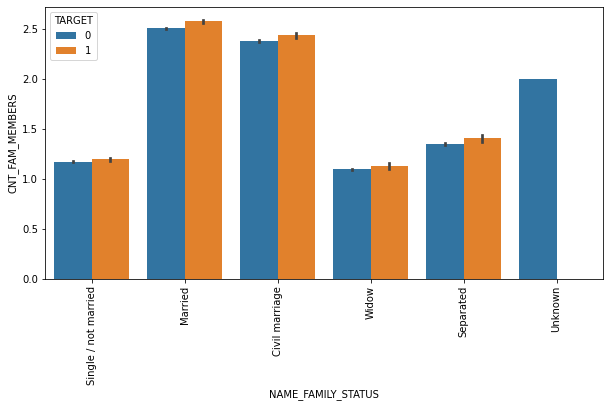

In [91]:
f, ax = plt.subplots(figsize=(10,5))
plot_1=sns.barplot("NAME_FAMILY_STATUS","CNT_FAM_MEMBERS",data=application_data,hue="TARGET")
plot_1.set_xticklabels(plot_1.get_xticklabels(), rotation=90)

Client who are married and has more children, chances to be a defaulter in High. 

[Text(0, 0, 'Single / not married'),
 Text(1, 0, 'Married'),
 Text(2, 0, 'Civil marriage'),
 Text(3, 0, 'Widow'),
 Text(4, 0, 'Separated'),
 Text(5, 0, 'Unknown')]

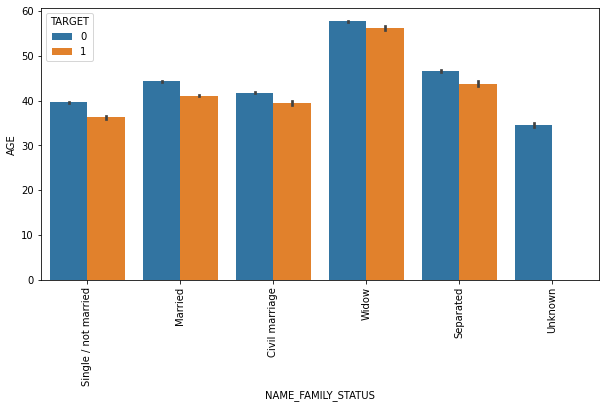

In [92]:
f, ax = plt.subplots(figsize=(10,5))
plot_1=sns.barplot("NAME_FAMILY_STATUS","AGE",data=application_data,hue="TARGET")
plot_1.set_xticklabels(plot_1.get_xticklabels(), rotation=90)

Based on the Bivariate analysis, some columns proved to be of no use, so dropping them

In [93]:
application_data.drop(["HOUR_APPR_PROCESS_START","FLAG_MOBIL"],axis=1,inplace=True)

## ANALYSING CORRELATION OF TARGET VARIABLE VS OTHER VARIABLES

In [94]:
Correlation = application_data.corr()
Correlation.sort_values(by=["TARGET"],ascending=False,inplace=True)


<AxesSubplot:>

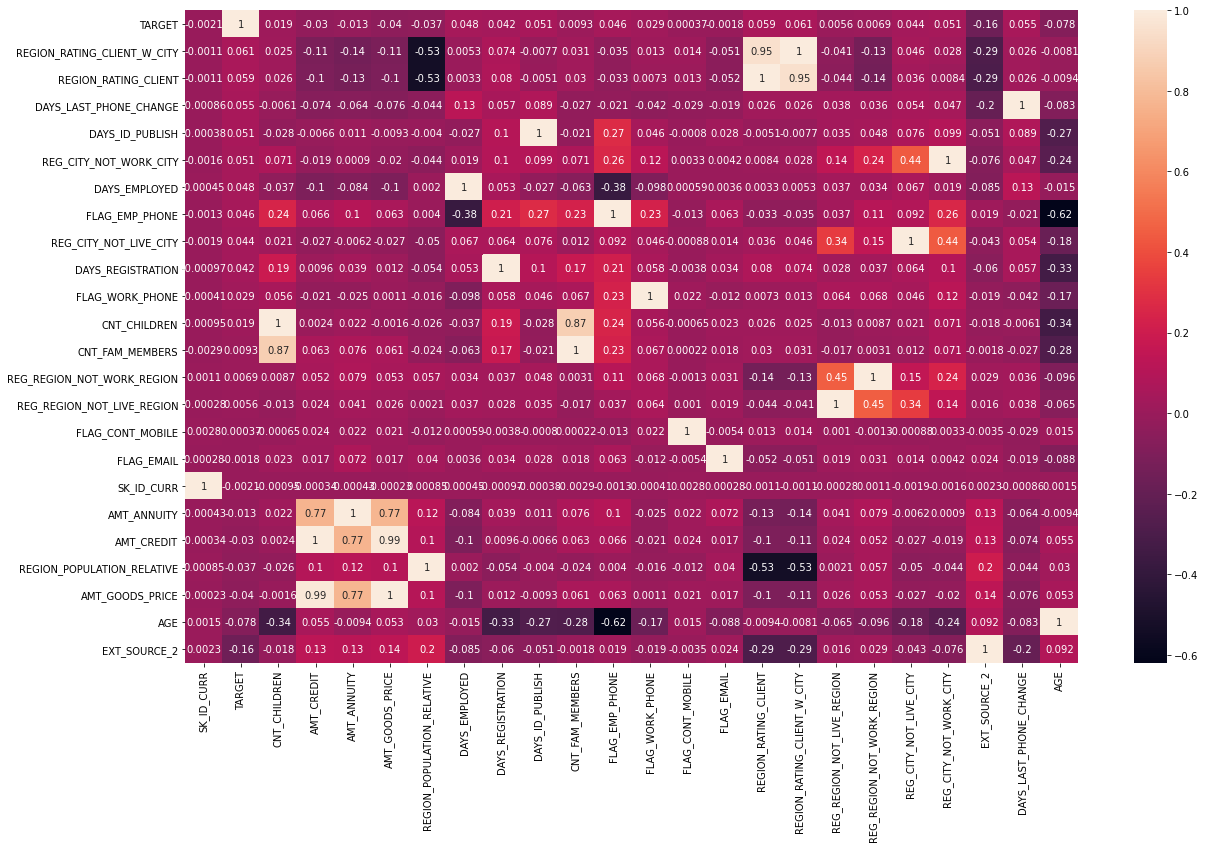

In [95]:
f, ax = plt.subplots(figsize=(20,12))
sns.heatmap(Correlation,annot=True)

In [96]:
Correlation.head(6)["TARGET"][1:]

REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
Name: TARGET, dtype: float64

In [97]:
Correlation.tail(5)["TARGET"]

AMT_CREDIT                   -0.030369
REGION_POPULATION_RELATIVE   -0.037227
AMT_GOODS_PRICE              -0.039628
AGE                          -0.078263
EXT_SOURCE_2                 -0.160303
Name: TARGET, dtype: float64

### Highly Correlated Variables
1. AMT_CREDIT and AMT_GOODS_PRICE =0.99
2. REGION_RATING_CLIENT_W_CITY and REGION_RATING_CLIENT = 0.95
3. CNT_FAM_MEMBERS and CNT_CHILDREN = 0.87
4. AMT_ANNUITY and AMT_CREDIT = 0.77

# Analysing Previous Application

In [98]:
#Reading previous.csv Data
previous_data = pd.read_csv('previous_application.csv')
previous_data

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [99]:
previous_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [100]:
# Percentage of null values in each column

(previous_data.isnull().sum() * 100 / len(previous_data)).round(2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [101]:
# Calculate percentage of NaN values in DataFrame

def get_perc_of_missing_values(series):
    num = series.isnull().sum()
    den = len(series)
    return round(num/den, 3)
get_perc_of_missing_values(previous_data)

SK_ID_PREV                     0.000
SK_ID_CURR                     0.000
NAME_CONTRACT_TYPE             0.000
AMT_ANNUITY                    0.223
AMT_APPLICATION                0.000
AMT_CREDIT                     0.000
AMT_DOWN_PAYMENT               0.536
AMT_GOODS_PRICE                0.231
WEEKDAY_APPR_PROCESS_START     0.000
HOUR_APPR_PROCESS_START        0.000
FLAG_LAST_APPL_PER_CONTRACT    0.000
NFLAG_LAST_APPL_IN_DAY         0.000
RATE_DOWN_PAYMENT              0.536
RATE_INTEREST_PRIMARY          0.996
RATE_INTEREST_PRIVILEGED       0.996
NAME_CASH_LOAN_PURPOSE         0.000
NAME_CONTRACT_STATUS           0.000
DAYS_DECISION                  0.000
NAME_PAYMENT_TYPE              0.000
CODE_REJECT_REASON             0.000
NAME_TYPE_SUITE                0.491
NAME_CLIENT_TYPE               0.000
NAME_GOODS_CATEGORY            0.000
NAME_PORTFOLIO                 0.000
NAME_PRODUCT_TYPE              0.000
CHANNEL_TYPE                   0.000
SELLERPLACE_AREA               0.000
N

In [102]:
# Iterate over columns in DataFrame and delete the values are null which are > 20%

for col, values in previous_data.iteritems():
    if get_perc_of_missing_values(previous_data[col]) > 0.20:
        previous_data.drop(col, axis=1, inplace=True)
previous_data

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,...,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,17145.0,17145.0,SATURDAY,15,Y,1,XAP,...,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,middle,POS mobile with interest
1,2802425,108129,Cash loans,607500.0,679671.0,THURSDAY,11,Y,1,XNA,...,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,112500.0,136444.5,TUESDAY,11,Y,1,XNA,...,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,high,Cash X-Sell: high
3,2819243,176158,Cash loans,450000.0,470790.0,MONDAY,7,Y,1,XNA,...,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,337500.0,404055.0,THURSDAY,9,Y,1,Repairs,...,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high,Cash Street: high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,267295.5,311400.0,WEDNESDAY,12,Y,1,XAP,...,XAP,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,low_normal,POS industry with interest
1670210,2357031,334635,Consumer loans,87750.0,64291.5,TUESDAY,15,Y,1,XAP,...,XAP,New,Furniture,POS,XNA,Stone,43,Furniture,middle,POS industry with interest
1670211,2659632,249544,Consumer loans,105237.0,102523.5,MONDAY,12,Y,1,XAP,...,XAP,Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,low_normal,POS household with interest
1670212,2785582,400317,Cash loans,180000.0,191880.0,WEDNESDAY,9,Y,1,XNA,...,XAP,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,low_normal,Cash X-Sell: low


In [103]:
# Percentage of null values in each column

(previous_data.isnull().sum() * 100 / len(previous_data)).round(2)

SK_ID_PREV                     0.00
SK_ID_CURR                     0.00
NAME_CONTRACT_TYPE             0.00
AMT_APPLICATION                0.00
AMT_CREDIT                     0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
FLAG_LAST_APPL_PER_CONTRACT    0.00
NFLAG_LAST_APPL_IN_DAY         0.00
NAME_CASH_LOAN_PURPOSE         0.00
NAME_CONTRACT_STATUS           0.00
DAYS_DECISION                  0.00
NAME_PAYMENT_TYPE              0.00
CODE_REJECT_REASON             0.00
NAME_CLIENT_TYPE               0.00
NAME_GOODS_CATEGORY            0.00
NAME_PORTFOLIO                 0.00
NAME_PRODUCT_TYPE              0.00
CHANNEL_TYPE                   0.00
SELLERPLACE_AREA               0.00
NAME_SELLER_INDUSTRY           0.00
NAME_YIELD_GROUP               0.00
PRODUCT_COMBINATION            0.02
dtype: float64

In [104]:
previous_data.shape

(1670214, 23)

In [105]:
# Filling 2% missing value with the Highest Mode in PRODUCT_COMBINATION column

previous_data["PRODUCT_COMBINATION"].fillna(previous_data["PRODUCT_COMBINATION"].mode()[0],inplace=True)

### Visualising to get some viable inference

**Contract Status**

In [106]:
Contract_Status = previous_data['NAME_CONTRACT_STATUS']
Contract_Status

0          Approved
1          Approved
2          Approved
3          Approved
4           Refused
             ...   
1670209    Approved
1670210    Approved
1670211    Approved
1670212    Approved
1670213    Approved
Name: NAME_CONTRACT_STATUS, Length: 1670214, dtype: object

In [107]:
# Percentage of contract status 

df_1=round((Contract_Status.value_counts()/previous_data["NAME_CONTRACT_STATUS"].count())*100,2)
df_1 = pd.DataFrame(df_1)
df_1.reset_index(level=0, inplace=True)
df_1.rename(columns=  {"index": "NAME_CONTRACT_STATUS", 
                     "NAME_CONTRACT_STATUS":"Percentage_of_Values"}, 
                                 inplace = True) 
df_1.sort_values(by = 'Percentage_of_Values' , inplace = True, ascending = False)
df_1

,NAME_CONTRACT_STATUS,Percentage_of_Values
0,Approved,62.07
1,Canceled,18.94
2,Refused,17.40
3,Unused offer,1.58


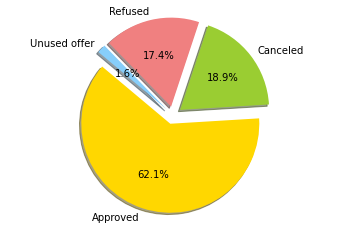

In [108]:
# Data to plot

labels = 'Approved', 'Canceled', 'Refused', 'Unused offer'
sizes = df_1['Percentage_of_Values']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0.1, 0.1, 0.1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

**Client Type**

In [109]:
Client_Type = previous_data['NAME_CLIENT_TYPE']
Client_Type

0           Repeater
1           Repeater
2           Repeater
3           Repeater
4           Repeater
             ...    
1670209    Refreshed
1670210          New
1670211     Repeater
1670212     Repeater
1670213     Repeater
Name: NAME_CLIENT_TYPE, Length: 1670214, dtype: object

In [110]:
# Percentage of contract status 

df_2=round((Client_Type.value_counts()/previous_data["NAME_CLIENT_TYPE"].count())*100,2)
df_2 = pd.DataFrame(df_2)
df_2.reset_index(level=0, inplace=True)
df_2.rename(columns=  {"index": "NAME_CLIENT_TYPE", 
                     "NAME_CLIENT_TYPE":"Percentage_of_Values"}, 
                                 inplace = True) 
df_2.sort_values(by = 'Percentage_of_Values' , inplace = True, ascending = False)
df_2

,NAME_CLIENT_TYPE,Percentage_of_Values
0,Repeater,73.72
1,New,18.04
2,Refreshed,8.12
3,XNA,0.12


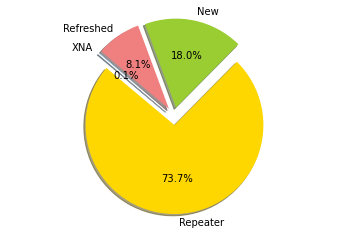

In [111]:
# Data to plot

labels = 'Repeater', 'New', 'Refreshed', 'XNA'
sizes = df_2['Percentage_of_Values']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0.1, 0.1, 0.1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

73.4% applicants are repeaters. Only, 18.4% are new clients.

In [112]:
Contract_Type = previous_data['NAME_CONTRACT_TYPE']
Contract_Type

0          Consumer loans
1              Cash loans
2              Cash loans
3              Cash loans
4              Cash loans
                ...      
1670209    Consumer loans
1670210    Consumer loans
1670211    Consumer loans
1670212        Cash loans
1670213        Cash loans
Name: NAME_CONTRACT_TYPE, Length: 1670214, dtype: object

In [113]:
# Percentage of contract status 

df_3=round((Contract_Type.value_counts()/previous_data["NAME_CONTRACT_TYPE"].count())*100,2)
df_3 = pd.DataFrame(df_3)
df_3.reset_index(level=0, inplace=True)
df_3.rename(columns=  {"index": "NAME_CONTRACT_TYPE", 
                     "NAME_CONTRACT_TYPE":"Percentage_of_Values"}, 
                                 inplace = True) 
df_3.sort_values(by = 'Percentage_of_Values' , inplace = True, ascending = False)
df_3

,NAME_CONTRACT_TYPE,Percentage_of_Values
0,Cash loans,44.76
1,Consumer loans,43.66
2,Revolving loans,11.57
3,XNA,0.02


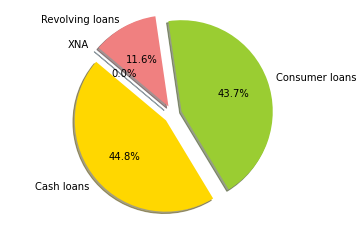

In [114]:
# Data to plot
labels = 'Cash loans', 'Consumer loans', 'Revolving loans', 'XNA'
sizes = df_3['Percentage_of_Values']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0.1, 0.1, 0.1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

**Days of approval - WEEKDAY_APPR_PROCESS_START**

In [115]:
Approval_days = previous_data['WEEKDAY_APPR_PROCESS_START']
Approval_days

0           SATURDAY
1           THURSDAY
2            TUESDAY
3             MONDAY
4           THURSDAY
             ...    
1670209    WEDNESDAY
1670210      TUESDAY
1670211       MONDAY
1670212    WEDNESDAY
1670213       SUNDAY
Name: WEEKDAY_APPR_PROCESS_START, Length: 1670214, dtype: object

In [116]:
# Percentage of contract status 

df_4=round((Approval_days.value_counts()/previous_data["WEEKDAY_APPR_PROCESS_START"].count())*100,2)
df_4 = pd.DataFrame(df_4)
df_4.reset_index(level=0, inplace=True)
df_4.rename(columns=  {"index": "WEEKDAY_APPR_PROCESS_START", 
                     "WEEKDAY_APPR_PROCESS_START":"Percentage_of_Values"}, 
                                 inplace = True) 
df_4.sort_values(by = 'Percentage_of_Values' , inplace = True, ascending = False)
df_4

,WEEKDAY_APPR_PROCESS_START,Percentage_of_Values
0,TUESDAY,15.27
1,WEDNESDAY,15.27
2,MONDAY,15.18
3,FRIDAY,15.09
4,THURSDAY,14.91
5,SATURDAY,14.41
6,SUNDAY,9.86


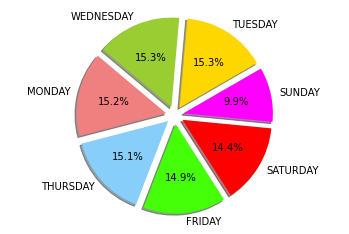

In [117]:
# Data to plot
labels = 'TUESDAY', 'WEDNESDAY', 'MONDAY', 'THURSDAY' , 'FRIDAY' , 'SATURDAY' , 'SUNDAY' 
sizes = df_4['Percentage_of_Values']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue' , '#44FF07' ,'Red','Fuchsia']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=30)

plt.axis('equal')
plt.show()

Most of the clients have opted to apply loan on Tuesday.
Applicants are very low on weekends.

**Purpose of loan  - NAME_CASH_LOAN_PURPOSE**

In [118]:
previous_data.NAME_CASH_LOAN_PURPOSE

0              XAP
1              XNA
2              XNA
3              XNA
4          Repairs
            ...   
1670209        XAP
1670210        XAP
1670211        XAP
1670212        XNA
1670213        XNA
Name: NAME_CASH_LOAN_PURPOSE, Length: 1670214, dtype: object

In [119]:
Loan_Purpose = previous_data['NAME_CASH_LOAN_PURPOSE']
Loan_Purpose

0              XAP
1              XNA
2              XNA
3              XNA
4          Repairs
            ...   
1670209        XAP
1670210        XAP
1670211        XAP
1670212        XNA
1670213        XNA
Name: NAME_CASH_LOAN_PURPOSE, Length: 1670214, dtype: object

In [120]:
# Percentage of Loan Purpose

df_5=round((Loan_Purpose.value_counts()/previous_data["NAME_CASH_LOAN_PURPOSE"].count())*100,2)
df_5 = pd.DataFrame(df_5)
df_5.reset_index(level=0, inplace=True)
df_5.rename(columns=  {"index": "NAME_CASH_LOAN_PURPOSE", 
                     "NAME_CASH_LOAN_PURPOSE":"Percentage_of_Values"}, 
                                 inplace = True) 
df_5.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
df_5

,NAME_CASH_LOAN_PURPOSE,Percentage_of_Values
0,XAP,55.24
1,XNA,40.59
2,Repairs,1.42
3,Other,0.93
4,Urgent needs,0.50
5,Buying a used car,0.17
6,Building a house or an annex,0.16
7,Everyday expenses,0.14
8,Medicine,0.13
9,Payments on other loans,0.12


[Text(0, 0, 'XAP'),
 Text(1, 0, 'XNA'),
 Text(2, 0, 'Repairs'),
 Text(3, 0, 'Other'),
 Text(4, 0, 'Urgent needs'),
 Text(5, 0, 'Buying a used car'),
 Text(6, 0, 'Building a house or an annex'),
 Text(7, 0, 'Everyday expenses'),
 Text(8, 0, 'Medicine'),
 Text(9, 0, 'Payments on other loans'),
 Text(10, 0, 'Education'),
 Text(11, 0, 'Journey'),
 Text(12, 0, 'Wedding / gift / holiday'),
 Text(13, 0, 'Purchase of electronic equipment'),
 Text(14, 0, 'Buying a new car'),
 Text(15, 0, 'Buying a home'),
 Text(16, 0, 'Car repairs'),
 Text(17, 0, 'Furniture'),
 Text(18, 0, 'Buying a holiday home / land'),
 Text(19, 0, 'Business development'),
 Text(20, 0, 'Gasification / water supply'),
 Text(21, 0, 'Buying a garage'),
 Text(22, 0, 'Hobby'),
 Text(23, 0, 'Money for a third person'),
 Text(24, 0, 'Refusal to name the goal')]

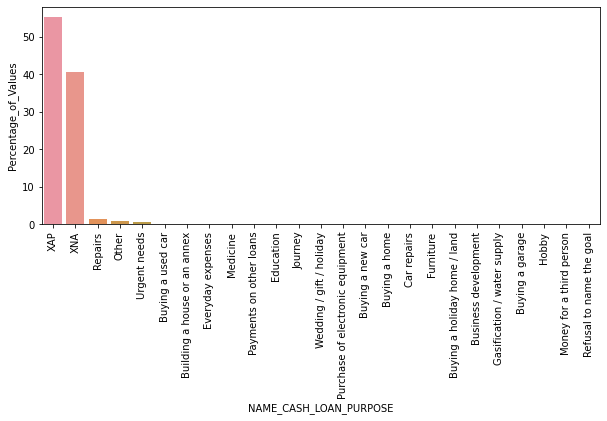

In [121]:
f, ax = plt.subplots(figsize=(10,4))
plot_2=sns.barplot("NAME_CASH_LOAN_PURPOSE","Percentage_of_Values",data=df_5)
plot_2.set_xticklabels(plot_2.get_xticklabels(), rotation=90)

Most Loan purpose was not recorded. **XAP and XNA** values are highest.

**Payment type - NAME_PAYMENT_TYPE**

In [122]:
Payment_Type = previous_data['NAME_PAYMENT_TYPE']
#find the percentage of Payment Type
df_6=round((Payment_Type.value_counts()/previous_data["NAME_PAYMENT_TYPE"].count())*100,2)
df_6 = pd.DataFrame(df_6)
df_6.reset_index(level=0, inplace=True)
df_6.rename(columns=  {"index": "NAME_PAYMENT_TYPE", 
                     "NAME_PAYMENT_TYPE":"Percentage_of_Values"}, 
                                 inplace = True) 
df_6.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
df_6

,NAME_PAYMENT_TYPE,Percentage_of_Values
0,Cash through the bank,61.88
1,XNA,37.56
2,Non-cash from your account,0.49
3,Cashless from the account of the employer,0.06


[Text(0, 0, 'Cash through the bank'),
 Text(1, 0, 'XNA'),
 Text(2, 0, 'Non-cash from your account'),
 Text(3, 0, 'Cashless from the account of the employer')]

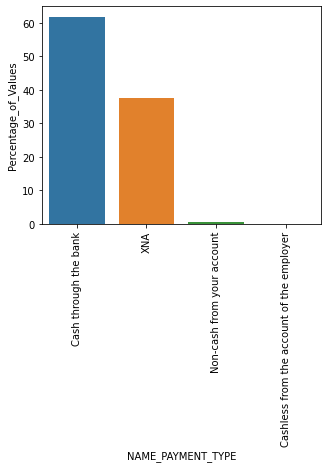

In [123]:
f, ax = plt.subplots(figsize=(5,4))
plot_2=sns.barplot("NAME_PAYMENT_TYPE","Percentage_of_Values",data=df_6)
plot_2.set_xticklabels(plot_2.get_xticklabels(), rotation=90)

Most people preferred **CASH(62.44%)** as the mode of Payment

**Reason of rejection of loan - CODE_REJECT_REASON**

In [124]:
Code_Rejection = previous_data['CODE_REJECT_REASON']
#find the percentage of Payment Type
df_7=round((Code_Rejection.value_counts()/previous_data["CODE_REJECT_REASON"].count())*100,2)
df_7 = pd.DataFrame(df_7)
df_7.reset_index(level=0, inplace=True)
df_7.rename(columns=  {"index": "CODE_REJECT_REASON", 
                     "CODE_REJECT_REASON":"Percentage_of_Values"}, 
                                 inplace = True) 
df_7.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
df_7

,CODE_REJECT_REASON,Percentage_of_Values
0,XAP,81.01
1,HC,10.49
2,LIMIT,3.33
3,SCO,2.24
4,CLIENT,1.58
5,SCOFR,0.77
6,XNA,0.31
7,VERIF,0.21
8,SYSTEM,0.04


[Text(0, 0, 'XAP'),
 Text(1, 0, 'HC'),
 Text(2, 0, 'LIMIT'),
 Text(3, 0, 'SCO'),
 Text(4, 0, 'CLIENT'),
 Text(5, 0, 'SCOFR'),
 Text(6, 0, 'XNA'),
 Text(7, 0, 'VERIF'),
 Text(8, 0, 'SYSTEM')]

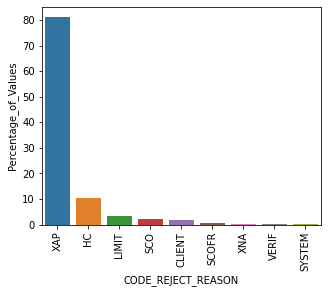

In [125]:
f, ax = plt.subplots(figsize=(5,4))
plot_2=sns.barplot("CODE_REJECT_REASON","Percentage_of_Values",data=df_7)
plot_2.set_xticklabels(plot_2.get_xticklabels(), rotation=90)

Primary reason for the Loan to get rejected is not recorded(**XAP (81%)**) followed by **HC**.

**goods did the client apply for in the previous application - NAME_GOODS_CATEGORY**

In [126]:
Goods_Category= previous_data['NAME_GOODS_CATEGORY']

# Percentage of goods Client applied 

df_8=round((Goods_Category.value_counts()/previous_data["NAME_GOODS_CATEGORY"].count())*100,2)
df_8 = pd.DataFrame(df_8)
df_8.reset_index(level=0, inplace=True)
df_8.rename(columns=  {"index": "NAME_GOODS_CATEGORY", 
                     "NAME_GOODS_CATEGORY":"Percentage_of_Values"}, 
                                 inplace = True) 
df_8.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
df_8

,NAME_GOODS_CATEGORY,Percentage_of_Values
0,XNA,56.93
1,Mobile,13.45
2,Consumer Electronics,7.28
3,Computers,6.33
4,Audio/Video,5.95
5,Furniture,3.21
6,Photo / Cinema Equipment,1.50
7,Construction Materials,1.50
8,Clothing and Accessories,1.41
9,Auto Accessories,0.44


[Text(0, 0, 'XNA'),
 Text(1, 0, 'Mobile'),
 Text(2, 0, 'Consumer Electronics'),
 Text(3, 0, 'Computers'),
 Text(4, 0, 'Audio/Video'),
 Text(5, 0, 'Furniture'),
 Text(6, 0, 'Photo / Cinema Equipment'),
 Text(7, 0, 'Construction Materials'),
 Text(8, 0, 'Clothing and Accessories'),
 Text(9, 0, 'Auto Accessories'),
 Text(10, 0, 'Jewelry'),
 Text(11, 0, 'Homewares'),
 Text(12, 0, 'Medical Supplies'),
 Text(13, 0, 'Vehicles'),
 Text(14, 0, 'Sport and Leisure'),
 Text(15, 0, 'Gardening'),
 Text(16, 0, 'Other'),
 Text(17, 0, 'Office Appliances'),
 Text(18, 0, 'Tourism'),
 Text(19, 0, 'Medicine'),
 Text(20, 0, 'Direct Sales'),
 Text(21, 0, 'Fitness'),
 Text(22, 0, 'Additional Service'),
 Text(23, 0, 'Education'),
 Text(24, 0, 'Weapon'),
 Text(25, 0, 'Insurance'),
 Text(26, 0, 'Animals'),
 Text(27, 0, 'House Construction')]

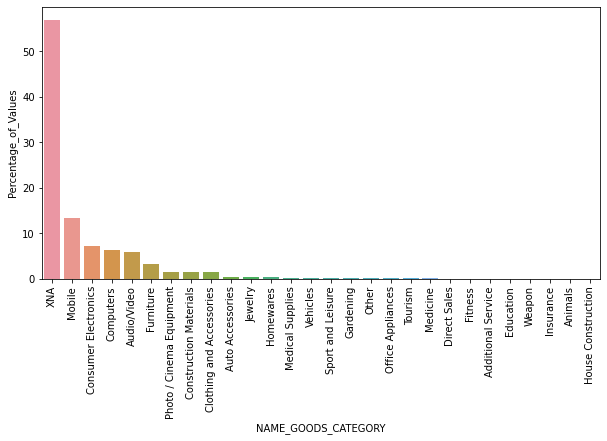

In [127]:
f, ax = plt.subplots(figsize=(10,5))
plot_2=sns.barplot("NAME_GOODS_CATEGORY","Percentage_of_Values",data=df_8)
plot_2.set_xticklabels(plot_2.get_xticklabels(), rotation=90)

Most clients applied for Mobile and 53.96% of the data is not recorded(XNA).

**Was the previous application for CASH, POS, CAR, … - NAME_PORTFOLIO**

In [128]:
Portfolio= previous_data['NAME_PORTFOLIO']

# Percentage of Portfolio

df_9=round((Portfolio.value_counts()/previous_data["NAME_PORTFOLIO"].count())*100,2)
df_9 = pd.DataFrame(df_9)
df_9.reset_index(level=0, inplace=True)
df_9.rename(columns=  {"index": "NAME_PORTFOLIO", 
                     "NAME_PORTFOLIO":"Percentage_of_Values"}, 
                                 inplace = True) 
df_9.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
df_9

,NAME_PORTFOLIO,Percentage_of_Values
0,POS,41.37
1,Cash,27.63
2,XNA,22.29
3,Cards,8.68
4,Cars,0.03


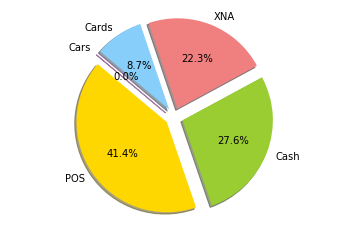

In [129]:
# Data to plot

labels = df_9.NAME_PORTFOLIO
sizes = df_9.Percentage_of_Values
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','Fuchsia']
explode = (0.1, 0.1, 0.1, 0.1,0.1)  # explode 1st slice

# Plot

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

41.4% of the applications were for POS.

**Was the previous application x-sell or walk-in - NAME_PRODUCT_TYPE**

In [130]:
Product_Type= previous_data['NAME_PRODUCT_TYPE']

# Percentage of Product Type

df_10=round((Product_Type.value_counts()/previous_data["NAME_PRODUCT_TYPE"].count())*100,2)
df_10 = pd.DataFrame(df_10)
df_10.reset_index(level=0, inplace=True)
df_10.rename(columns=  {"index": "NAME_PRODUCT_TYPE", 
                     "NAME_PRODUCT_TYPE":"Percentage_of_Values"}, 
                                 inplace = True) 
df_10.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
df_10

,NAME_PRODUCT_TYPE,Percentage_of_Values
0,XNA,63.68
1,x-sell,27.32
2,walk-in,9.00


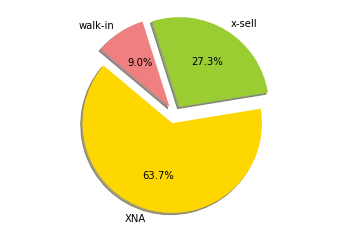

In [131]:
# Data to plot

labels = df_10.NAME_PRODUCT_TYPE
sizes = df_10.Percentage_of_Values
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0.1, 0.1)  # explode 1st slice

# Plot

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

X-sell applications were more than walk-in

**The client on the previous application - CHANNEL_TYPE**

In [132]:
Channel_Type= previous_data['CHANNEL_TYPE']

# Percentage of Channels via which client applied loan 

df_11=round((Channel_Type.value_counts()/previous_data["CHANNEL_TYPE"].count())*100,2)
df_11 = pd.DataFrame(df_11)
df_11.reset_index(level=0, inplace=True)
df_11.rename(columns=  {"index": "CHANNEL_TYPE", 
                     "CHANNEL_TYPE":"Percentage_of_Values"}, 
                                 inplace = True) 
df_11.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
df_11

,CHANNEL_TYPE,Percentage_of_Values
0,Credit and cash offices,43.11
1,Country-wide,29.62
2,Stone,12.70
3,Regional / Local,6.50
4,Contact center,4.27
5,AP+ (Cash loan),3.42
6,Channel of corporate sales,0.37
7,Car dealer,0.03


[Text(0, 0, 'Credit and cash offices'),
 Text(1, 0, 'Country-wide'),
 Text(2, 0, 'Stone'),
 Text(3, 0, 'Regional / Local'),
 Text(4, 0, 'Contact center'),
 Text(5, 0, 'AP+ (Cash loan)'),
 Text(6, 0, 'Channel of corporate sales'),
 Text(7, 0, 'Car dealer')]

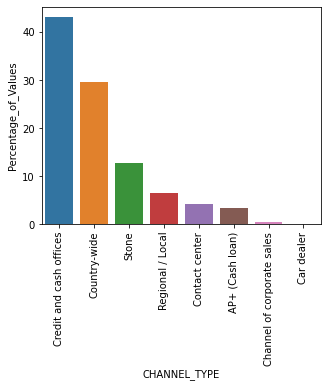

In [133]:
f, ax = plt.subplots(figsize=(5,4))
plot_2=sns.barplot("CHANNEL_TYPE","Percentage_of_Values",data=df_11)
plot_2.set_xticklabels(plot_2.get_xticklabels(), rotation=90)

Most clients were asquired from **Credit and Cash Offices**

**The industry of the seller - NAME_SELLER_INDUSTRY**

In [134]:
Seller_Industry= previous_data['NAME_SELLER_INDUSTRY']

# Percentage of goods Client applied 

df_12=round((Seller_Industry.value_counts()/previous_data["NAME_SELLER_INDUSTRY"].count())*100,2)
df_12 = pd.DataFrame(df_12)
df_12.reset_index(level=0, inplace=True)
df_12.rename(columns=  {"index": "NAME_SELLER_INDUSTRY", 
                     "NAME_SELLER_INDUSTRY":"Percentage_of_Values"}, 
                                 inplace = True) 
df_12.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
df_12

,NAME_SELLER_INDUSTRY,Percentage_of_Values
0,XNA,51.23
1,Consumer electronics,23.85
2,Connectivity,16.53
3,Furniture,3.46
4,Construction,1.78
5,Clothing,1.43
6,Industry,1.15
7,Auto technology,0.30
8,Jewelry,0.16
9,MLM partners,0.07


[Text(0, 0, 'XNA'),
 Text(1, 0, 'Consumer electronics'),
 Text(2, 0, 'Connectivity'),
 Text(3, 0, 'Furniture'),
 Text(4, 0, 'Construction'),
 Text(5, 0, 'Clothing'),
 Text(6, 0, 'Industry'),
 Text(7, 0, 'Auto technology'),
 Text(8, 0, 'Jewelry'),
 Text(9, 0, 'MLM partners'),
 Text(10, 0, 'Tourism')]

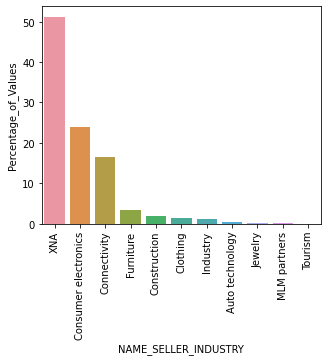

In [135]:
f, ax = plt.subplots(figsize=(5,4))
plot_2=sns.barplot("NAME_SELLER_INDUSTRY","Percentage_of_Values",data=df_12)
plot_2.set_xticklabels(plot_2.get_xticklabels(), rotation=90)

Most Sellers are from **Consumer electronics**

**Grouped interest rate into small medium and high of the previous application - NAME_YIELD_GROUP**

In [136]:
Yield_Groups= previous_data['NAME_YIELD_GROUP']

# Percentage of Interest rate into small, medium and high

df_13=round((Yield_Groups.value_counts()/previous_data["NAME_YIELD_GROUP"].count())*100,2)
df_13 = pd.DataFrame(df_13)
df_13.reset_index(level=0, inplace=True)
df_13.rename(columns=  {"index": "NAME_YIELD_GROUP", 
                     "NAME_YIELD_GROUP":"Percentage_of_Values"}, 
                                 inplace = True) 
df_13.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
df_13

,NAME_YIELD_GROUP,Percentage_of_Values
0,XNA,30.97
1,middle,23.08
2,high,21.15
3,low_normal,19.28
4,low_action,5.51


[Text(0, 0, 'XNA'),
 Text(1, 0, 'middle'),
 Text(2, 0, 'high'),
 Text(3, 0, 'low_normal'),
 Text(4, 0, 'low_action')]

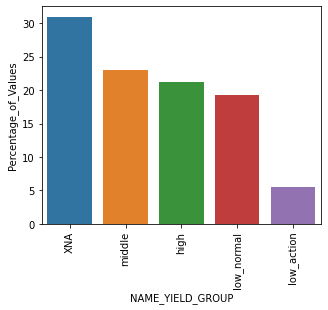

In [137]:
f, ax = plt.subplots(figsize=(5,4))
plot_2=sns.barplot("NAME_YIELD_GROUP","Percentage_of_Values",data=df_13)
plot_2.set_xticklabels(plot_2.get_xticklabels(), rotation=90)

Most group interest rates lie in middle.

**Detailed product combination of the previous application - PRODUCT_COMBINATION**

In [138]:
Product_Combination= previous_data['PRODUCT_COMBINATION']

# Percentage of Different Product Combinations

df_14=round((Product_Combination.value_counts()/previous_data["PRODUCT_COMBINATION"].count())*100,2)
df_14 = pd.DataFrame(df_14)
df_14.reset_index(level=0, inplace=True)
df_14.rename(columns=  {"index": "PRODUCT_COMBINATION", 
                     "PRODUCT_COMBINATION":"Percentage_of_Values"}, 
                                 inplace = True) 
df_14.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
df_14

,PRODUCT_COMBINATION,Percentage_of_Values
0,Cash,17.14
1,POS household with interest,15.78
2,POS mobile with interest,13.21
3,Cash X-Sell: middle,8.61
4,Cash X-Sell: low,7.80
5,Card Street,6.74
6,POS industry with interest,5.92
7,POS household without interest,4.96
8,Card X-Sell,4.82
9,Cash Street: high,3.57


[Text(0, 0, 'Cash'),
 Text(1, 0, 'POS household with interest'),
 Text(2, 0, 'POS mobile with interest'),
 Text(3, 0, 'Cash X-Sell: middle'),
 Text(4, 0, 'Cash X-Sell: low'),
 Text(5, 0, 'Card Street'),
 Text(6, 0, 'POS industry with interest'),
 Text(7, 0, 'POS household without interest'),
 Text(8, 0, 'Card X-Sell'),
 Text(9, 0, 'Cash Street: high'),
 Text(10, 0, 'Cash X-Sell: high'),
 Text(11, 0, 'Cash Street: middle'),
 Text(12, 0, 'Cash Street: low'),
 Text(13, 0, 'POS mobile without interest'),
 Text(14, 0, 'POS other with interest'),
 Text(15, 0, 'POS industry without interest'),
 Text(16, 0, 'POS others without interest')]

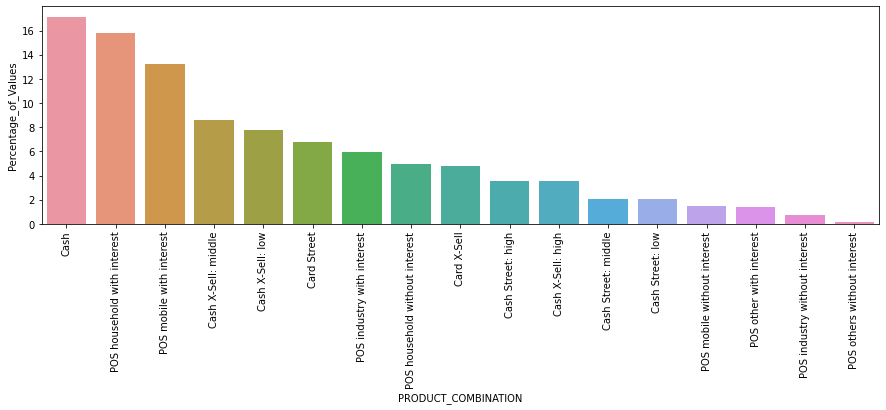

In [139]:
f, ax = plt.subplots(figsize=(15,4))
plot_2=sns.barplot("PRODUCT_COMBINATION","Percentage_of_Values",data=df_14)
plot_2.set_xticklabels(plot_2.get_xticklabels(), rotation=90)

Highest product combination is **Cash** followed by **POS household with interest**

**Flag if the application was the last application per day of the client - NFLAG_LAST_APPL_IN_DAY**

In [140]:
Insurance= previous_data['NFLAG_LAST_APPL_IN_DAY']

# Percentage of Client requested Insurance

df_15=round((Insurance.value_counts()/previous_data["NFLAG_LAST_APPL_IN_DAY"].count())*100,2)
df_15 = pd.DataFrame(df_15)
df_15.reset_index(level=0, inplace=True)
df_15.rename(columns=  {"index": "INSURANCE_FLAG", 
                     "NFLAG_LAST_APPL_IN_DAY":"Percentage_of_Values"}, 
                                 inplace = True) 
df_15.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
df_15

,INSURANCE_FLAG,Percentage_of_Values
0,1,99.65
1,0,0.35


[Text(0, 0, '0'), Text(1, 0, '1')]

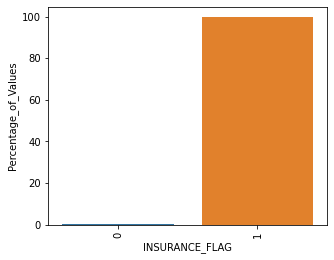

In [141]:
f, ax = plt.subplots(figsize=(5,4))
plot_2=sns.barplot("INSURANCE_FLAG","Percentage_of_Values",data=df_15)
plot_2.set_xticklabels(plot_2.get_xticklabels(), rotation=90)

For most clients it was the last application of the day.

In [142]:
previous_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_APPLICATION              1670214 non-null  float64
 4   AMT_CREDIT                   1670213 non-null  float64
 5   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 6   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 7   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 8   NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 9   NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 10  NAME_CONTRACT_STATUS         1670214 non-null  object 
 11  DAYS_DECISION                1670214 non-null  int64  
 12  NAME_PAYMENT_TYPE            1670214 non-n

**Correlation in previous_data df**

<AxesSubplot:>

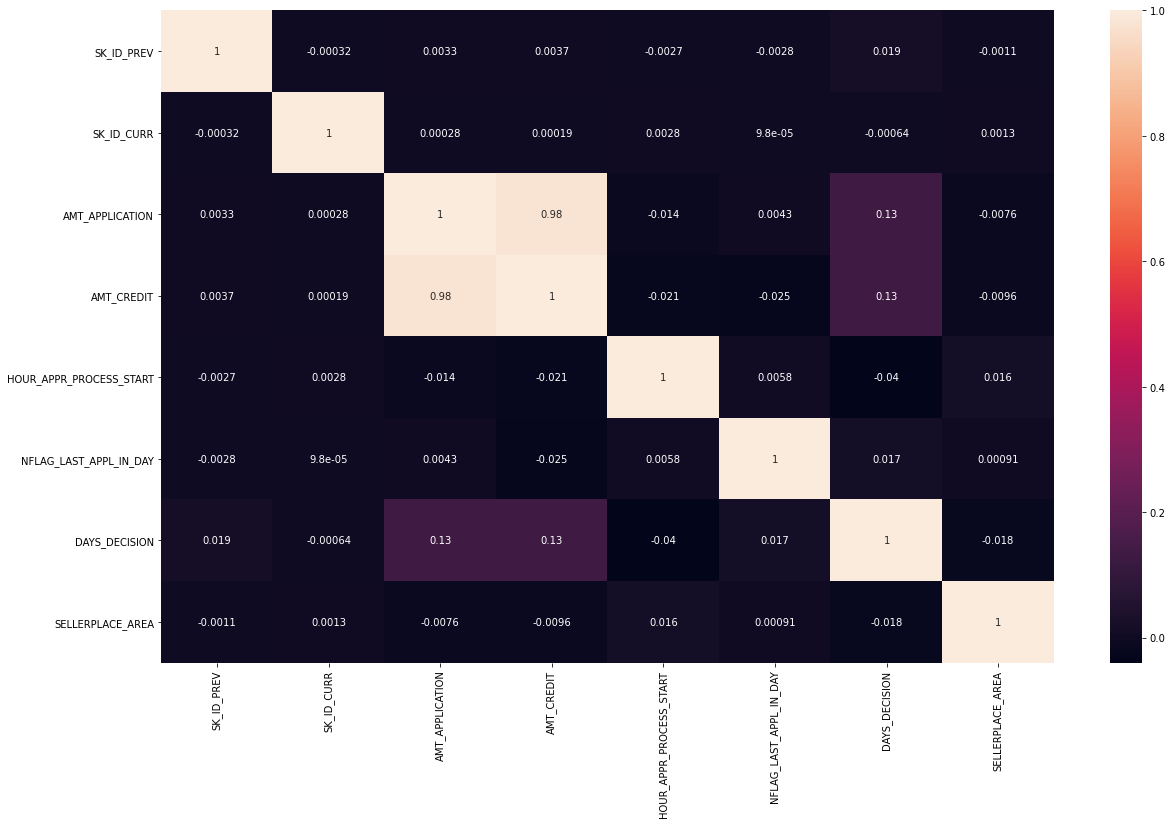

In [143]:
Correlation = previous_data.corr()
f, ax = plt.subplots(figsize=(20,12))
sns.heatmap(Correlation,annot=True)

The Correlation of variables in Previous Application

In [144]:
prev_current_app_df = pd.merge(previous_data,application_data,how="inner",on="SK_ID_CURR")
prev_current_app_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 58 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   SK_ID_PREV                    1413701 non-null  int64  
 1   SK_ID_CURR                    1413701 non-null  int64  
 2   NAME_CONTRACT_TYPE_x          1413701 non-null  object 
 3   AMT_APPLICATION               1413701 non-null  float64
 4   AMT_CREDIT_x                  1413700 non-null  float64
 5   WEEKDAY_APPR_PROCESS_START_x  1413701 non-null  object 
 6   HOUR_APPR_PROCESS_START       1413701 non-null  int64  
 7   FLAG_LAST_APPL_PER_CONTRACT   1413701 non-null  object 
 8   NFLAG_LAST_APPL_IN_DAY        1413701 non-null  int64  
 9   NAME_CASH_LOAN_PURPOSE        1413701 non-null  object 
 10  NAME_CONTRACT_STATUS          1413701 non-null  object 
 11  DAYS_DECISION                 1413701 non-null  int64  
 12  NAME_PAYMENT_TYPE           

In [145]:
# Percentage of null values in each column

(prev_current_app_df.isnull().sum() * 100 / len(prev_current_app_df)).round(2)

SK_ID_PREV                      0.0
SK_ID_CURR                      0.0
NAME_CONTRACT_TYPE_x            0.0
AMT_APPLICATION                 0.0
AMT_CREDIT_x                    0.0
WEEKDAY_APPR_PROCESS_START_x    0.0
HOUR_APPR_PROCESS_START         0.0
FLAG_LAST_APPL_PER_CONTRACT     0.0
NFLAG_LAST_APPL_IN_DAY          0.0
NAME_CASH_LOAN_PURPOSE          0.0
NAME_CONTRACT_STATUS            0.0
DAYS_DECISION                   0.0
NAME_PAYMENT_TYPE               0.0
CODE_REJECT_REASON              0.0
NAME_CLIENT_TYPE                0.0
NAME_GOODS_CATEGORY             0.0
NAME_PORTFOLIO                  0.0
NAME_PRODUCT_TYPE               0.0
CHANNEL_TYPE                    0.0
SELLERPLACE_AREA                0.0
NAME_SELLER_INDUSTRY            0.0
NAME_YIELD_GROUP                0.0
PRODUCT_COMBINATION             0.0
TARGET                          0.0
NAME_CONTRACT_TYPE_y            0.0
CODE_GENDER                     0.0
FLAG_OWN_CAR                    0.0
FLAG_OWN_REALTY             

**Correlation between previous_data and application_data dataframes**

<AxesSubplot:>

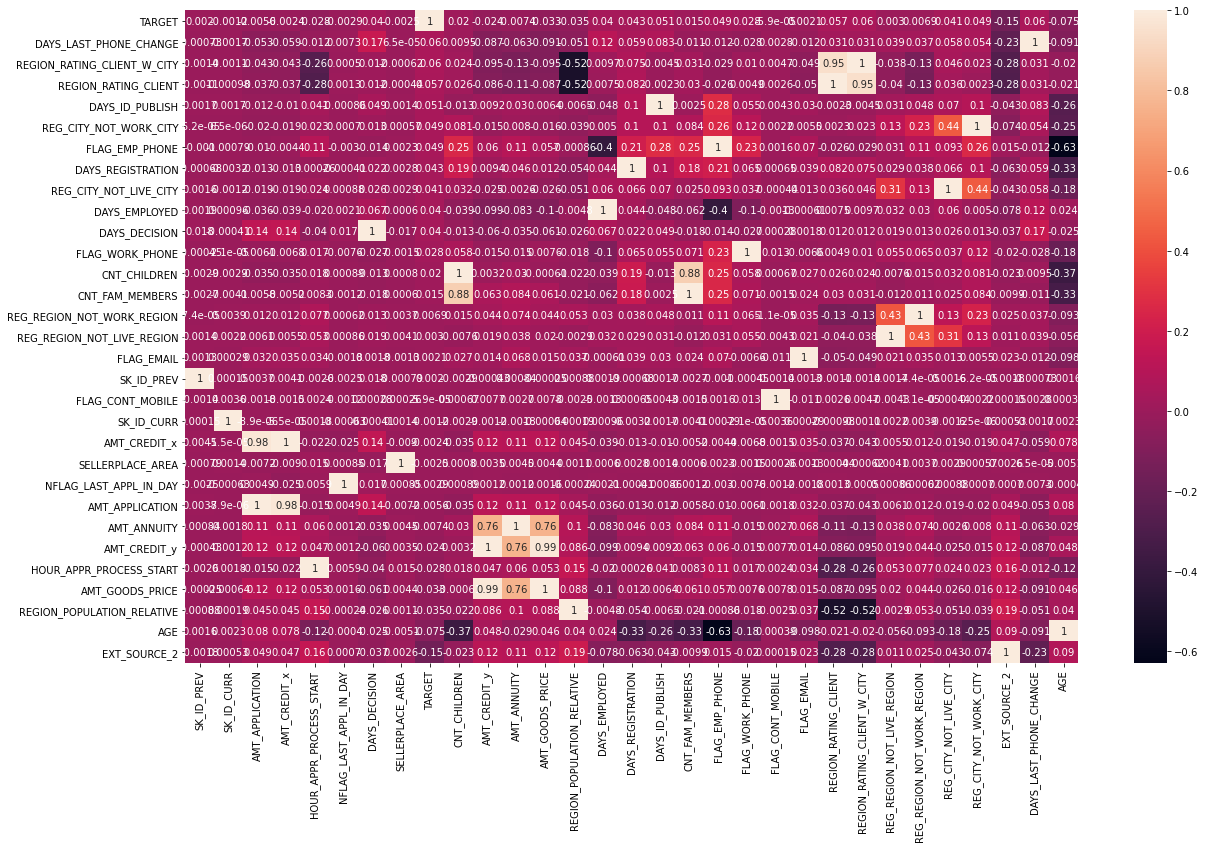

In [146]:
Correlation = prev_current_app_df.corr()
Correlation.sort_values(by=["TARGET"],ascending=False,inplace=True)
f, ax = plt.subplots(figsize=(20,12))
sns.heatmap(Correlation,annot=True)

The Correlation between **previous_data and application_data** dataframes

In [147]:
Correlation.head(6)["TARGET"][1:]

DAYS_LAST_PHONE_CHANGE         0.059721
REGION_RATING_CLIENT_W_CITY    0.059700
REGION_RATING_CLIENT           0.056932
DAYS_ID_PUBLISH                0.051037
REG_CITY_NOT_WORK_CITY         0.049353
Name: TARGET, dtype: float64

In [148]:
Correlation.tail(6)["TARGET"][1:]

HOUR_APPR_PROCESS_START      -0.027809
AMT_GOODS_PRICE              -0.032550
REGION_POPULATION_RELATIVE   -0.035028
AGE                          -0.074927
EXT_SOURCE_2                 -0.154919
Name: TARGET, dtype: float64